In [3]:
# ВКР

In [4]:
import numpy as np
import pandas as pd
import pickle as ps
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#sklearn (включает все алгоритмы и инструменты, которые нужны для задач классификации, регрессии и кластеризации.)
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

#нейр. сети
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
#загрузка файлов и объединение

data_sA = pd.read_excel('X_bp.xlsx', index_col=0, engine='openpyxl')
data_sB = pd.read_excel('X_nup.xlsx', index_col=0, engine='openpyxl')
Ob_dataset = data_sA.join(data_sB, how='inner')

In [6]:
#Развед. анализ
#Определение размера датасета и проверка наличия пропусков
print ("Количество строк в  : ", Ob_dataset.shape[0], 
      "\n количество столбцов (перем.) в : ", Ob_dataset.shape[1],
      "\n количество пропусков в данных  : ", Ob_dataset.isna().sum().sum())

Количество строк в  :  1023 
 количество столбцов (перем.) в :  13 
 количество пропусков в данных  :  0


In [7]:
#Инфа о датасете
Ob_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [8]:
#Описание датасета
Ob_dataset.describe().T



count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

In [9]:
# Использован меттод 'describe' DLL (pamdas), renturn основные показатели заданного массива данных.
# Вывод min и max имеют большой разброс. 2466.922843 - 3848.436732 и т.д.


In [10]:
#отрисовка гистограммы распределения и диаграммы ящика с усами 
#Для 12 из 13 параметров распределение имеет вид нормального распределения.
#Параметр «Угол нашивки, град» принимает дискретные значения 0 и 90. 
#Мы не будем отдельно присваивать им метки классов 0 и 1, т.к. при нормализации они также примут значения 0 и 1.
def data_hist_boxplot_func (data_set):
  for column in data_set:
    plt.figure(figsize=(14,5))
    plt.subplot(121)
    sns.histplot(x=data_set[column], kde=True)

    plt.subplot(122)
    sns.boxplot(data=data_set[column], width=0.3, palette='Set1', orient='h')
    plt.xlabel(column)


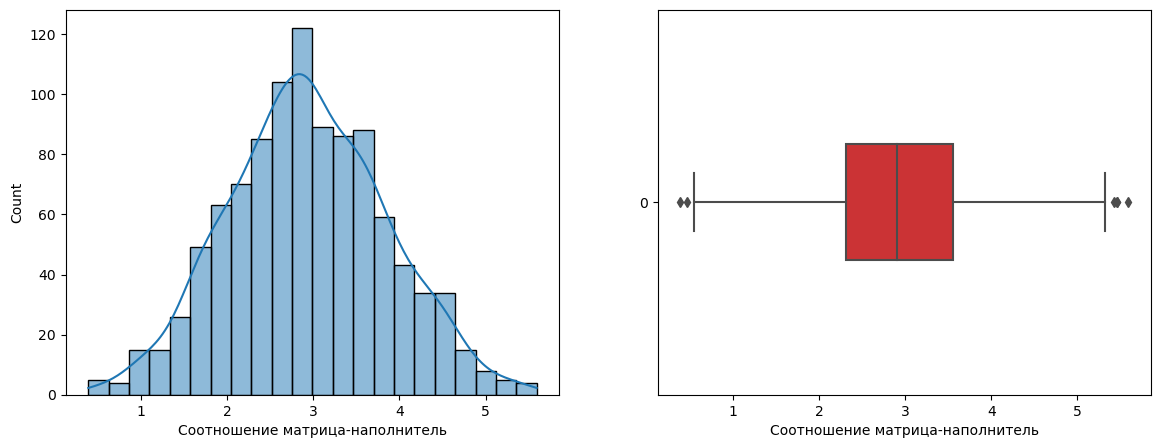

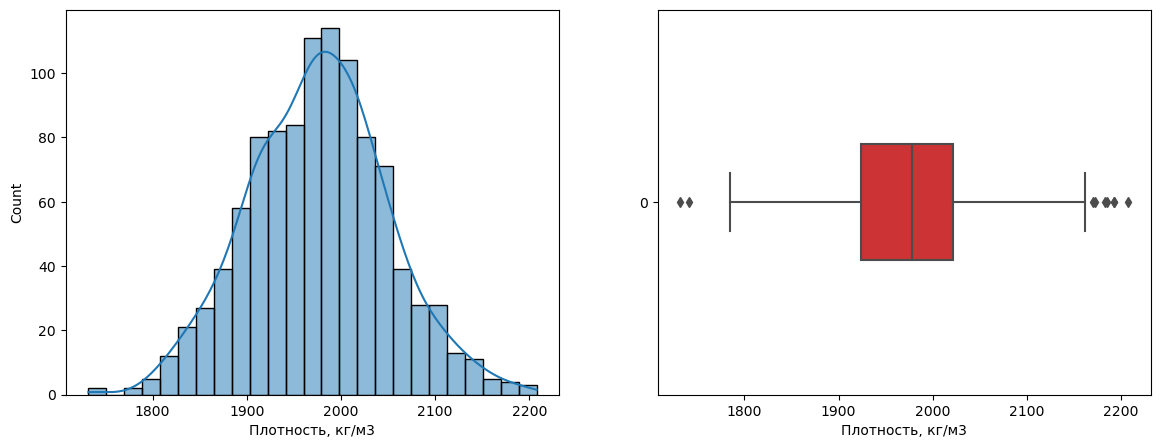

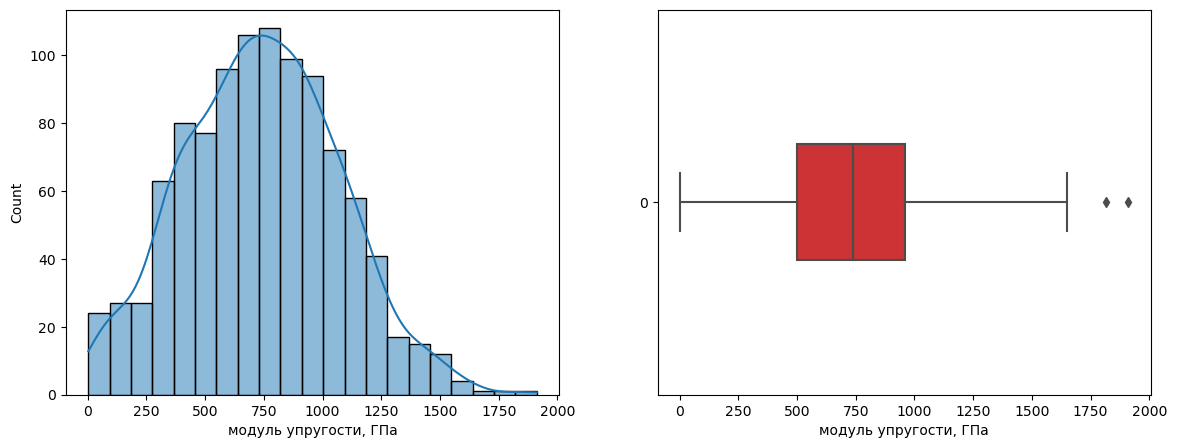

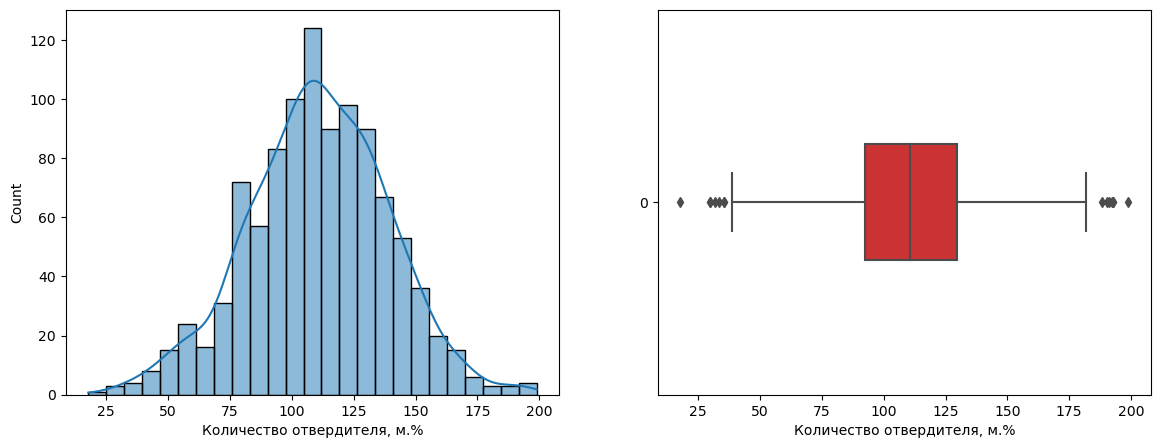

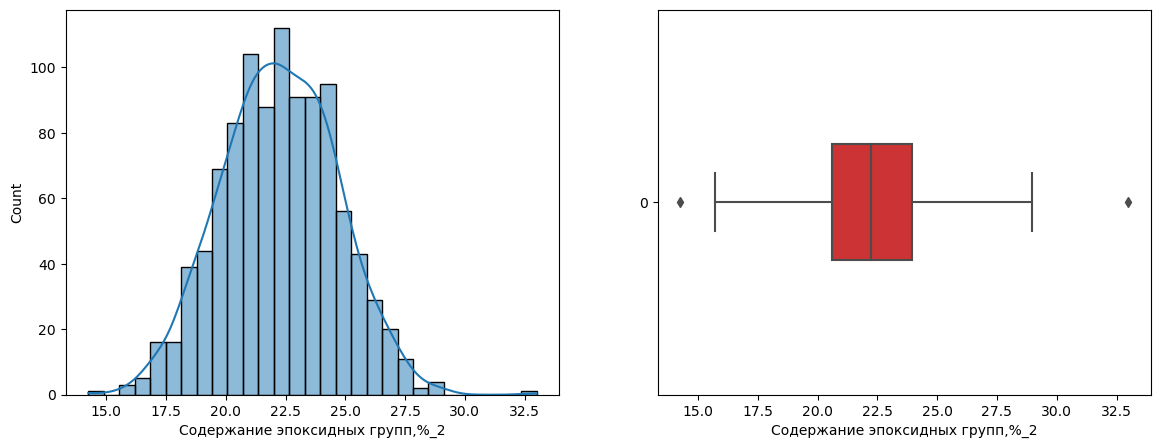

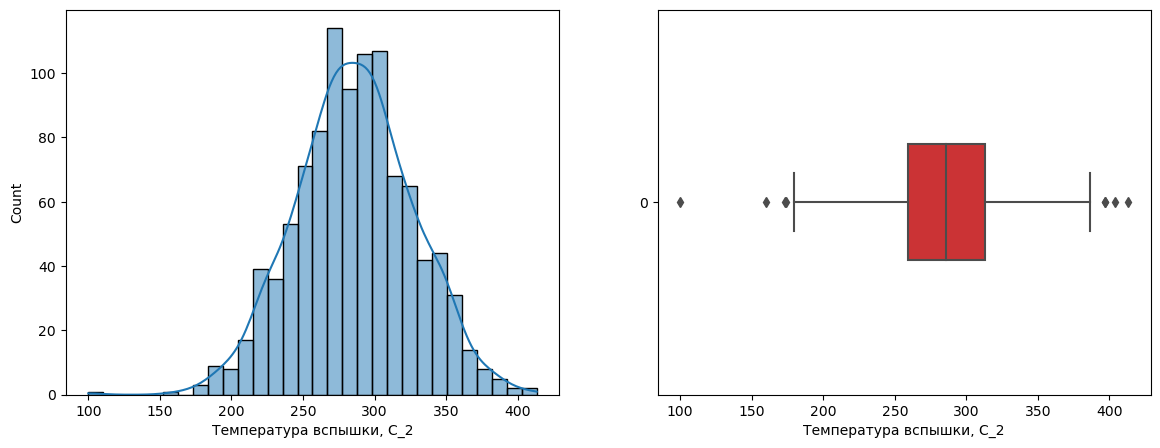

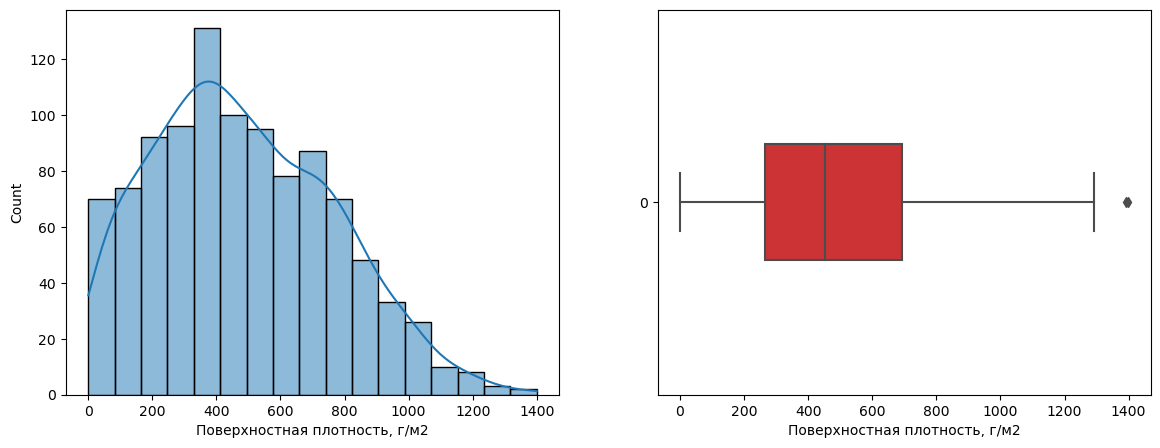

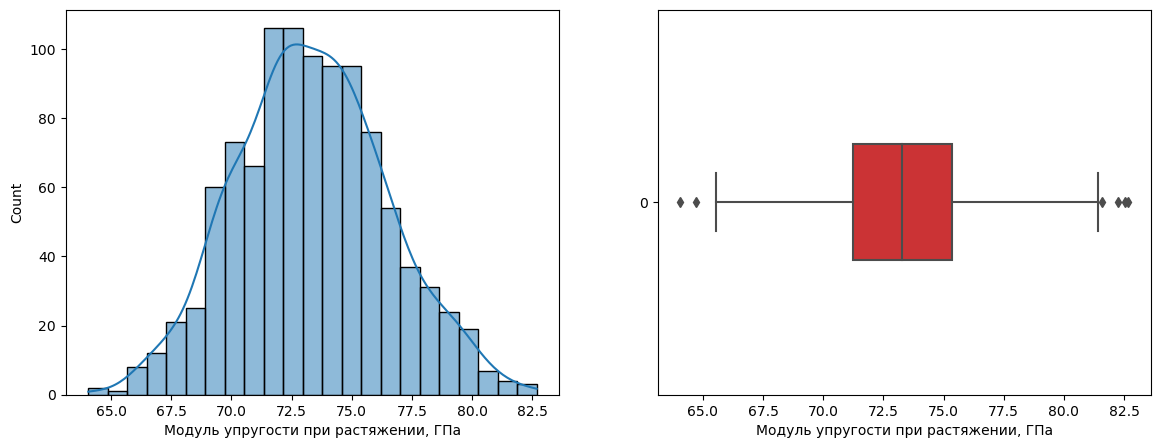

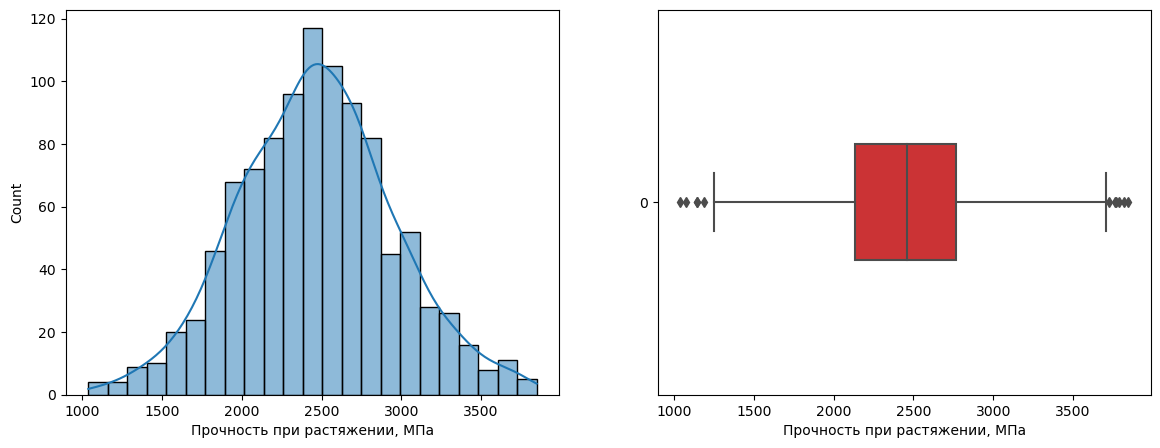

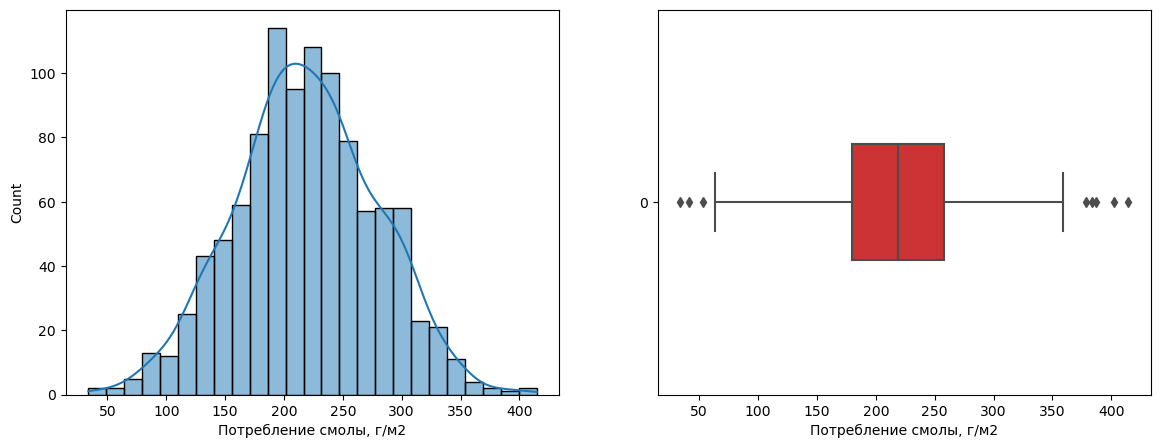

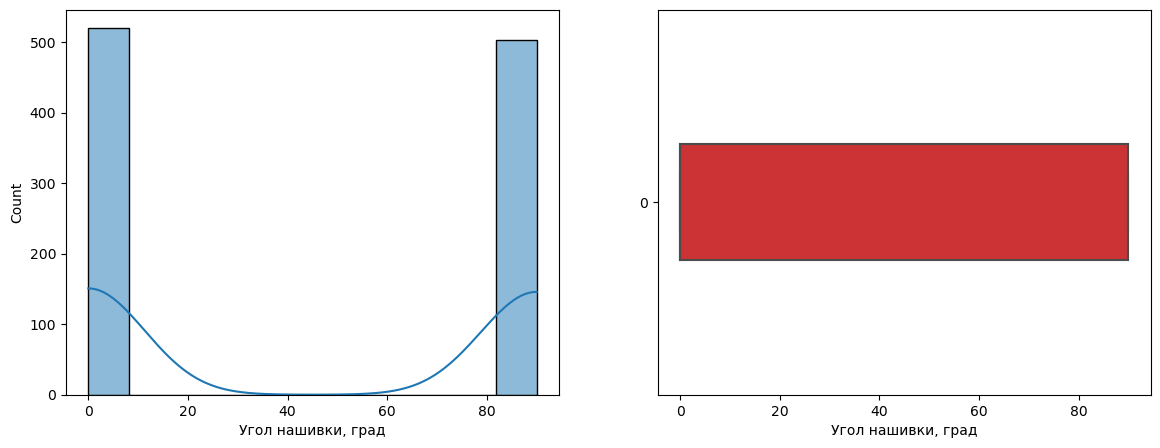

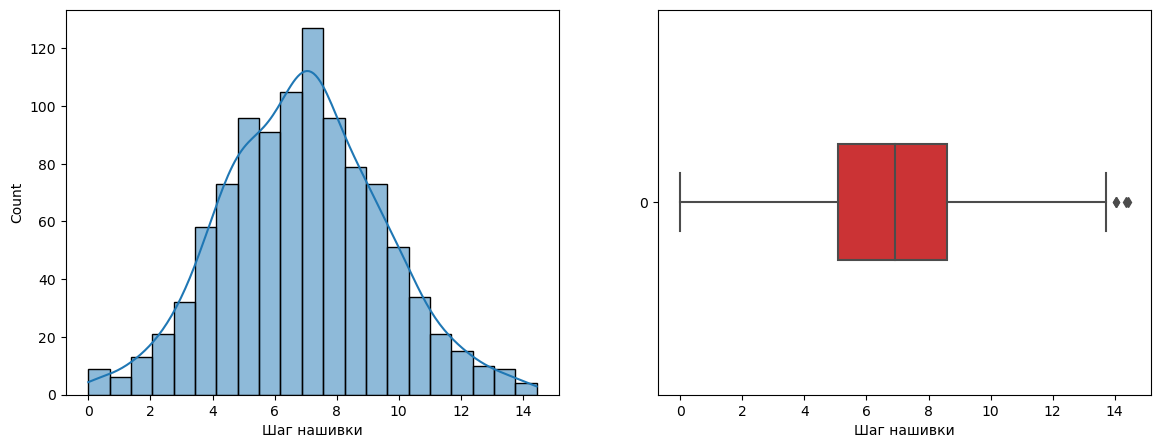

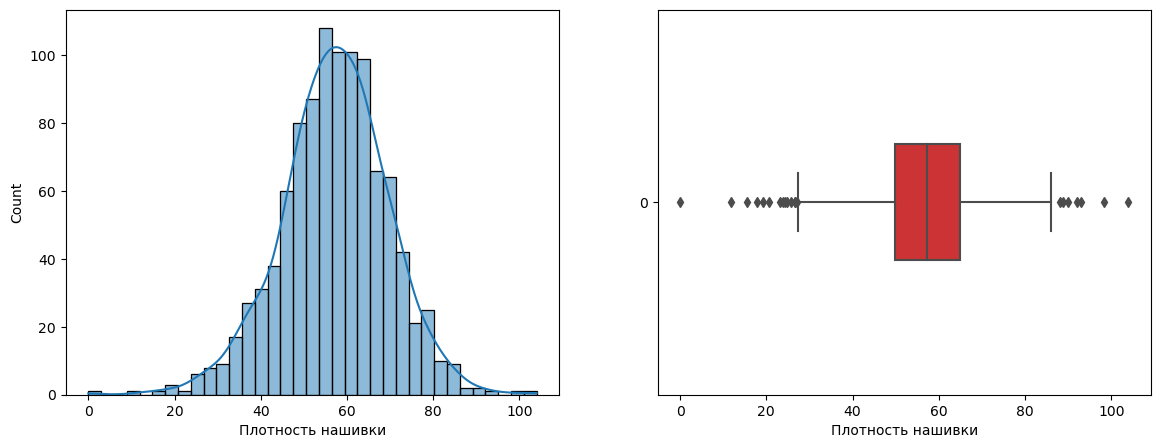

In [11]:
#отрисовка распределения и диаграммы ящика с усами для каждого показателя 
data_hist_boxplot_func(Ob_dataset)

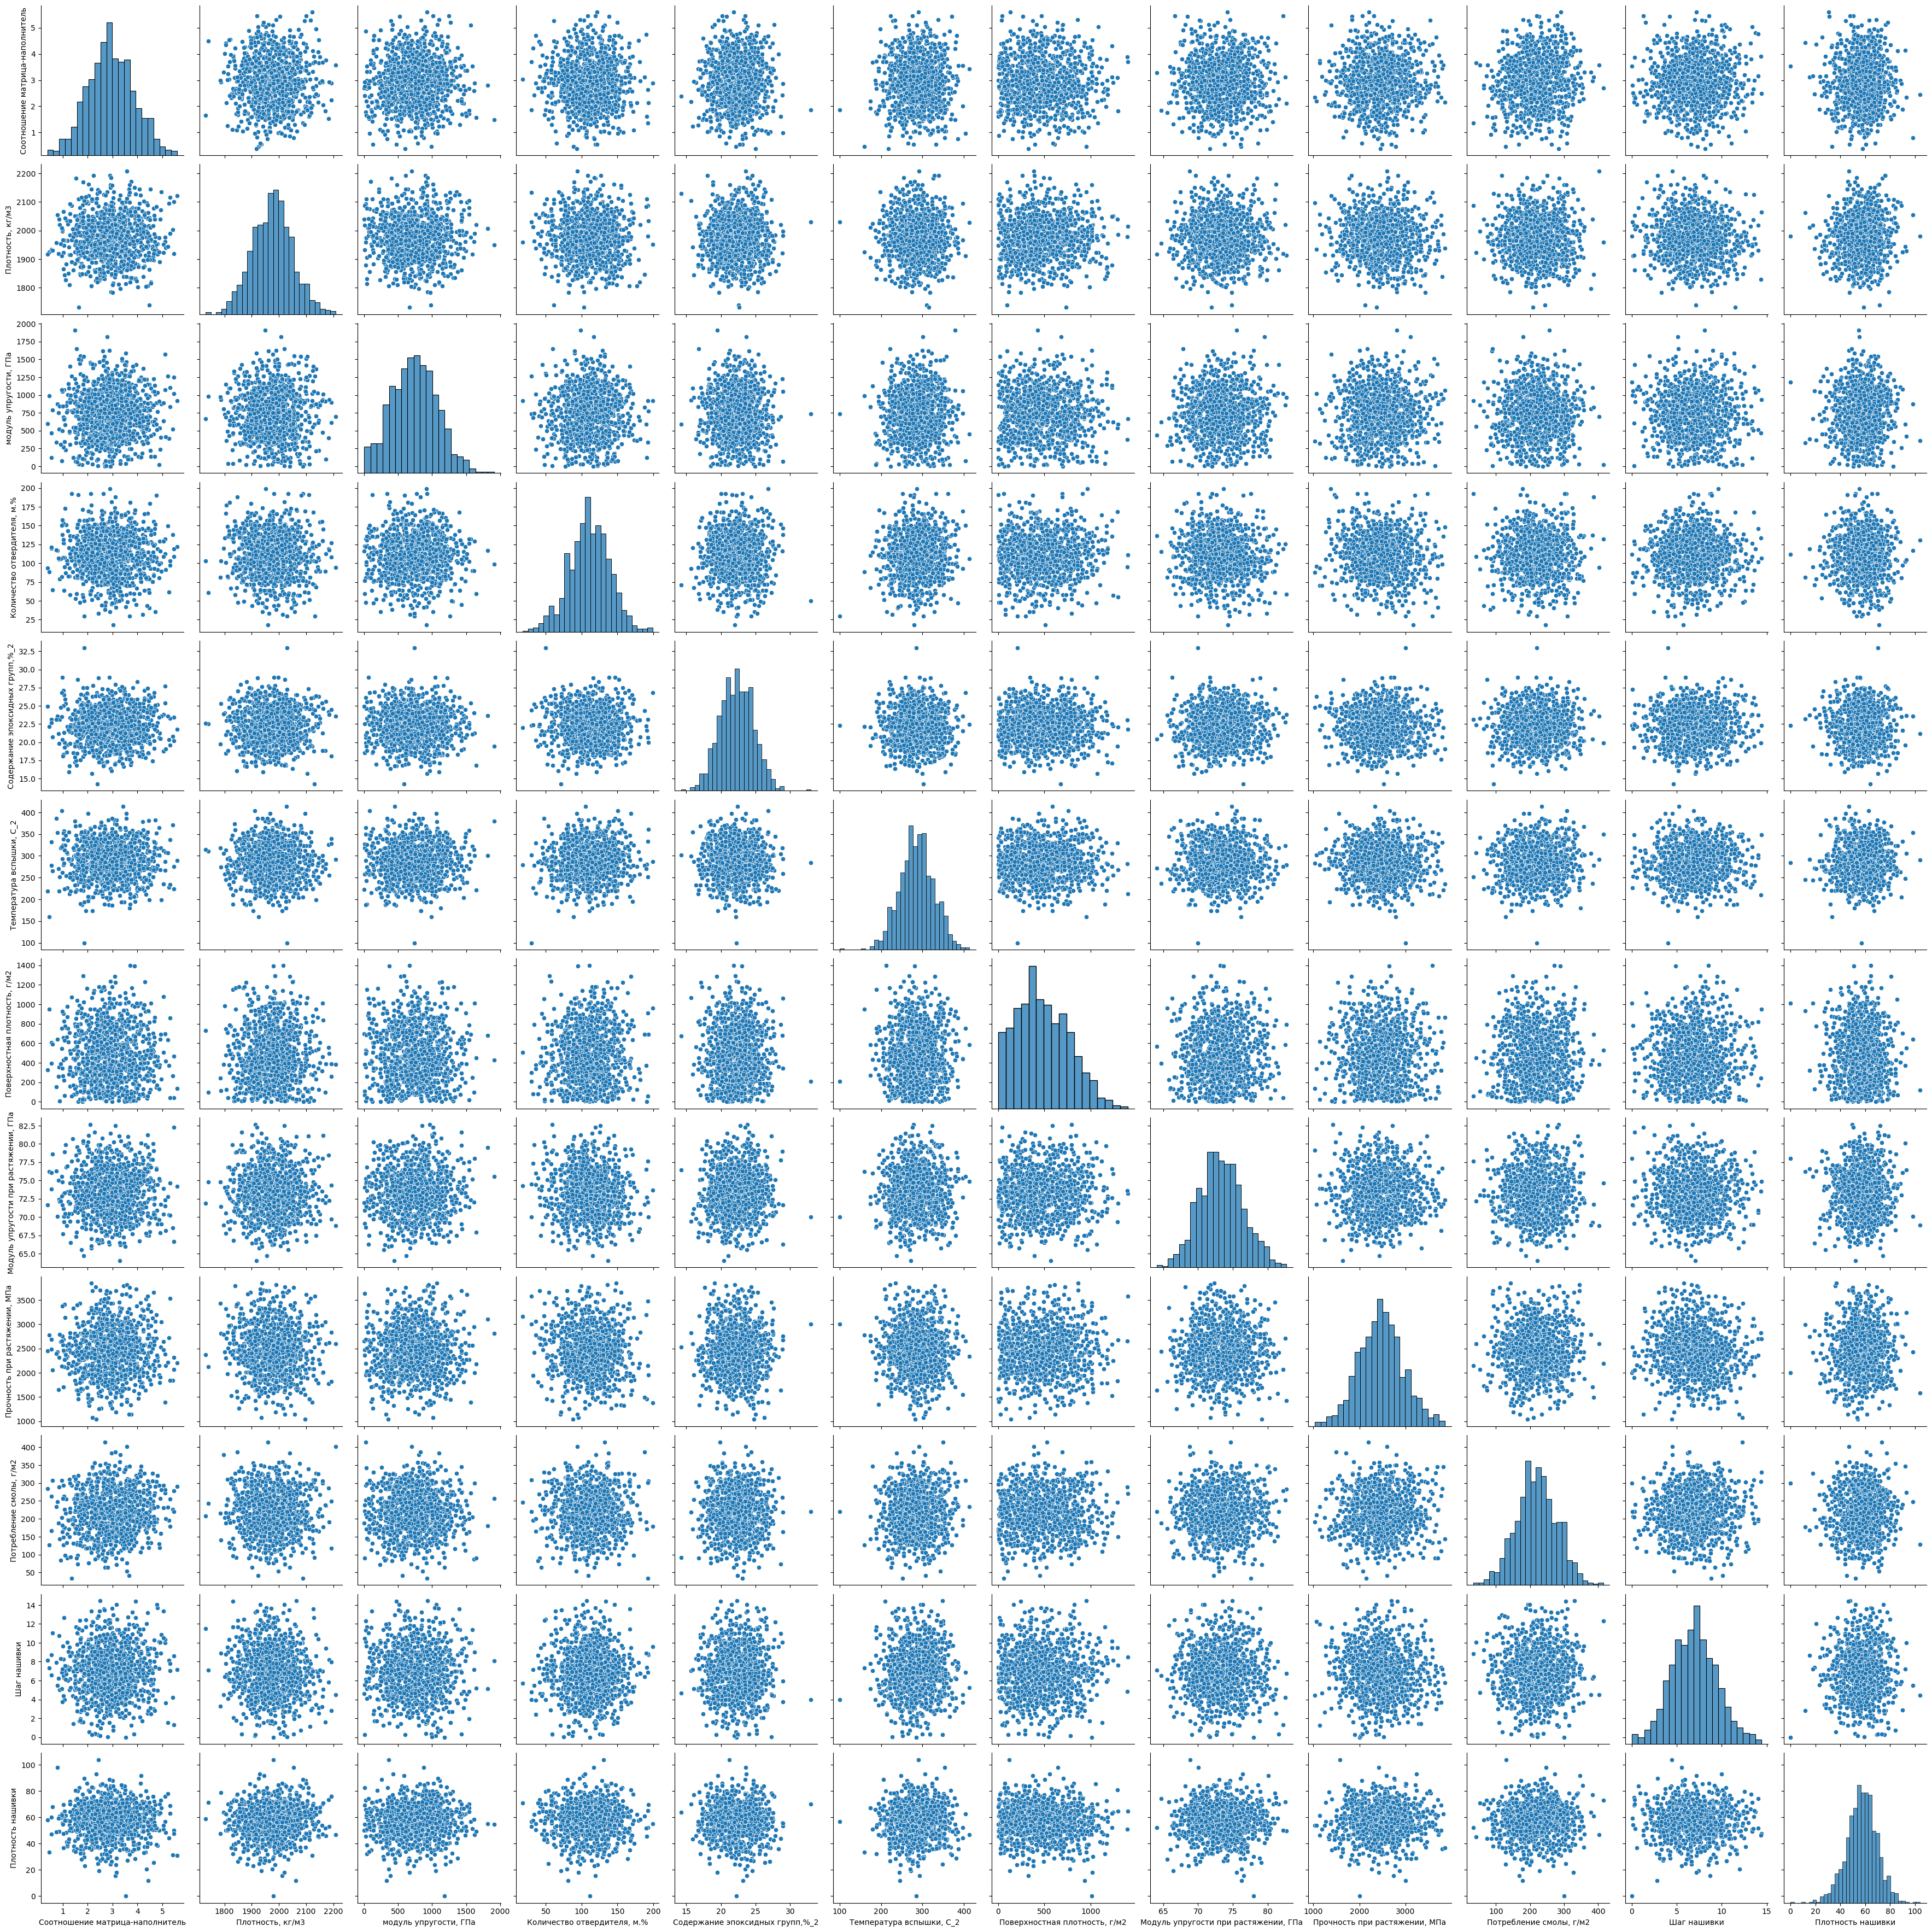

In [12]:
# Попарные графики рассеяния точек
sns.pairplot(Ob_dataset.drop(labels='Угол нашивки, град', axis = 1), height=3)
plt.savefig('scatter_points.jpg', dpi = 200, bbox_inches = 'tight', pad_inches = 0.5)


<AxesSubplot:>

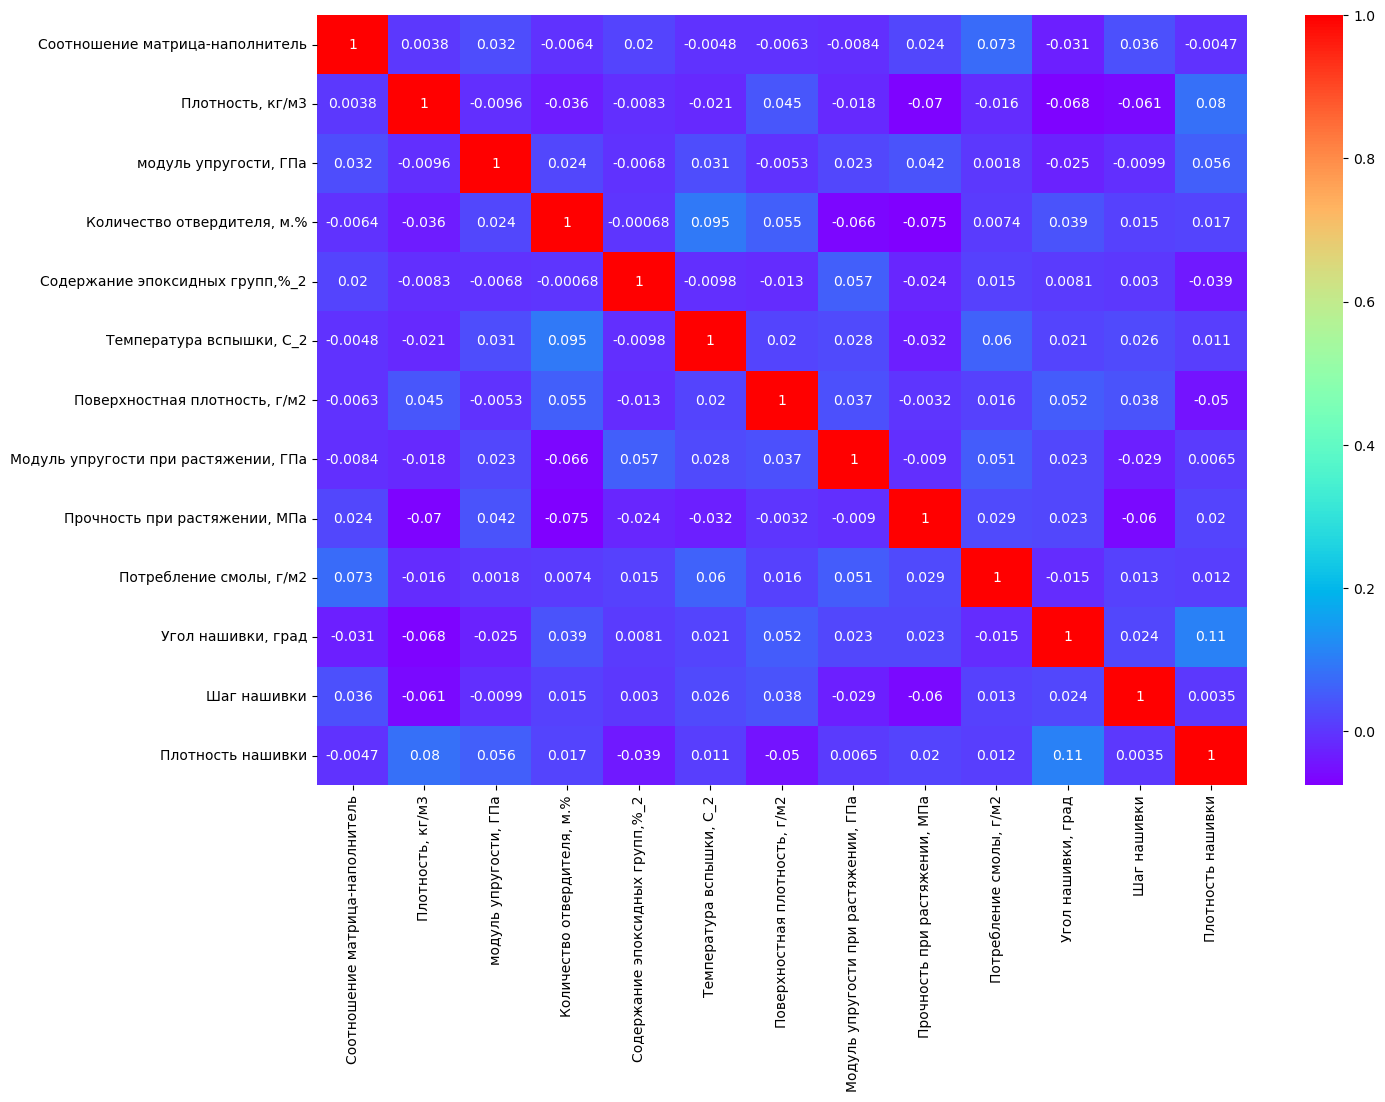

In [13]:
# Тепловая карта корелляции
plt.figure(figsize = (15, 10))
sns.heatmap(Ob_dataset.corr(), cmap = 'rainbow', annot = True)

In [14]:
# Вывод по тепловой карте: слабую зависимость 

In [15]:
# Анализ и исключение выбросов 
for column in Ob_dataset.columns:
  q75, q25 = np.percentile(a=Ob_dataset[column], q=[75,25])
  intr_qr = q75-q25
# IQR = Quartile3 – Quartile1 verh  Q3+1.5IQR niz Q1-1.5IQR
  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)
  Ob_dataset.loc[Ob_dataset[column] < min, column] = np.nan
  Ob_dataset.loc[Ob_dataset[column] > max, column] = np.nan
  
clean_dataset = Ob_dataset.dropna(axis = 0)

# Определение размера датасета после удаления выбросов и проверка наличия пропусков
print("Размер датасета после удаления  и проверка  пропусков: \n",
      "\nКоличество строк в очищенном датасете: ", clean_dataset.shape[0], 
      "\nКоличество столбцов (переменных) в очищенном датасете: ", clean_dataset.shape[1],
      "\nКоличество пропусков в данных очищенного датасета: ", clean_dataset.isna().sum().sum())

Размер датасета после удаления  и проверка  пропусков: 
 
Количество строк в очищенном датасете:  936 
Количество столбцов (переменных) в очищенном датасете:  13 
Количество пропусков в данных очищенного датасета:  0


<AxesSubplot:ylabel='Density'>

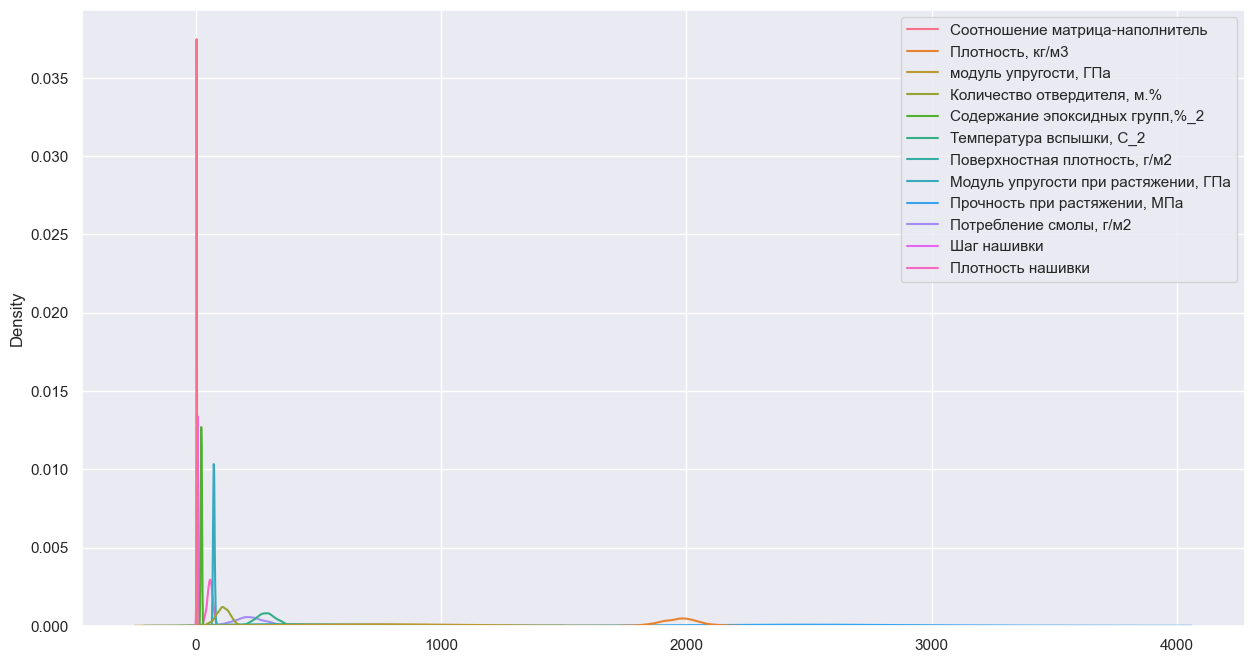

In [16]:
# Норм.данных
sns.set(font_scale=1)
plt.figure(figsize = (15,8))
sns.kdeplot(data=clean_dataset.drop(labels='Угол нашивки, град', axis = 1)) # угол не расматриваем

In [17]:
# Норм. данных scalar
scaler = MinMaxScaler(feature_range=(0,1)).fit_transform(clean_dataset)
zbc_dataset = pd.DataFrame(scaler, columns = clean_dataset.columns) 
zbc_dataset.describe().T

count      mean       std  min  \
Соотношение матрица-наполнитель       936.0  0.498933  0.187489  0.0   
Плотность, кг/м3                      936.0  0.502695  0.187779  0.0   
модуль упругости, ГПа                 936.0  0.446764  0.199583  0.0   
Количество отвердителя, м.%           936.0  0.504664  0.188865  0.0   
Содержание эпоксидных групп,%_2       936.0  0.491216  0.180620  0.0   
Температура вспышки, С_2              936.0  0.516059  0.190624  0.0   
Поверхностная плотность, г/м2         936.0  0.373733  0.217078  0.0   
Модуль упругости при растяжении, ГПа  936.0  0.488647  0.191466  0.0   
Прочность при растяжении, МПа         936.0  0.495706  0.188915  0.0   
Потребление смолы, г/м2               936.0  0.521141  0.195781  0.0   
Угол нашивки, град                    936.0  0.511752  0.500129  0.0   
Шаг нашивки                           936.0  0.502232  0.183258  0.0   
Плотность нашивки                     936.0  0.513776  0.191342  0.0   

                                           25%       50%       75%  max  
Соотношение матрица-наполнитель       0.372274  0.494538  0.629204  1.0  
Плотность, кг/м3                      0.368517  0.511229  0.624999  1.0  
модуль упругости, ГПа                 0.301243  0.447061  0.580446  1.0  
Количество отвердителя, м.%           0.376190  0.506040  0.637978  1.0  
Содержание эпоксидных групп,%_2       0.367716  0.489382  0.623410  1.0  
Температура вспышки, С_2              0.386128  0.515980  0.646450  1.0  
Поверхностная плотность, г/м2         0.205619  0.354161  0.538683  1.0  
Модуль упругости при растяжении, ГПа  0.359024  0.485754  0.615077  1.0  
Прочность при растяжении, МПа         0.365149  0.491825  0.612874  1.0  
Потребление смолы, г/м2               0.392067  0.523766  0.652447  1.0  
Угол нашивки, град                    0.000000  1.000000  1.000000  1.0  
Шаг нашивки                           0.372211  0.504258  0.624604  1.0  
Плотность нашивки                     0.390482  0.516029  0.638842  1.0

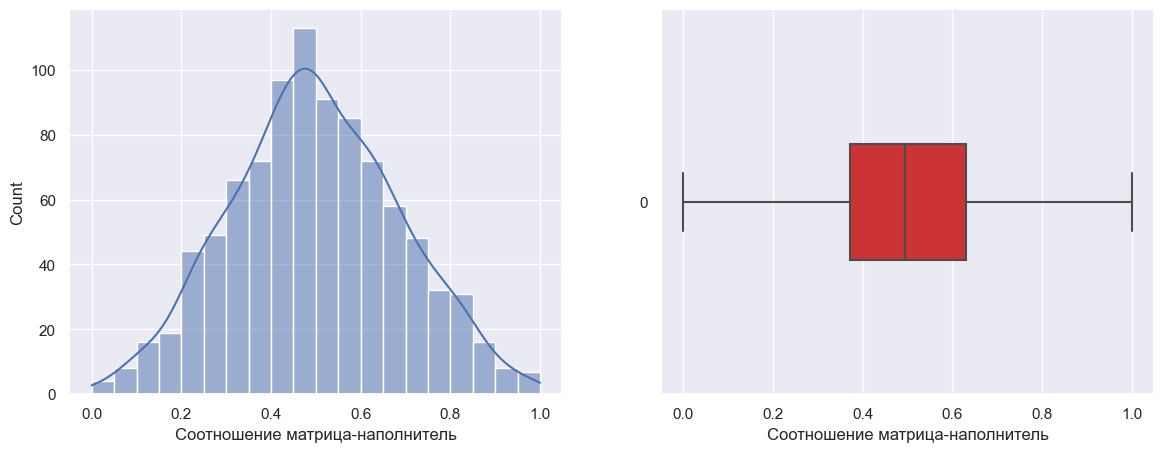

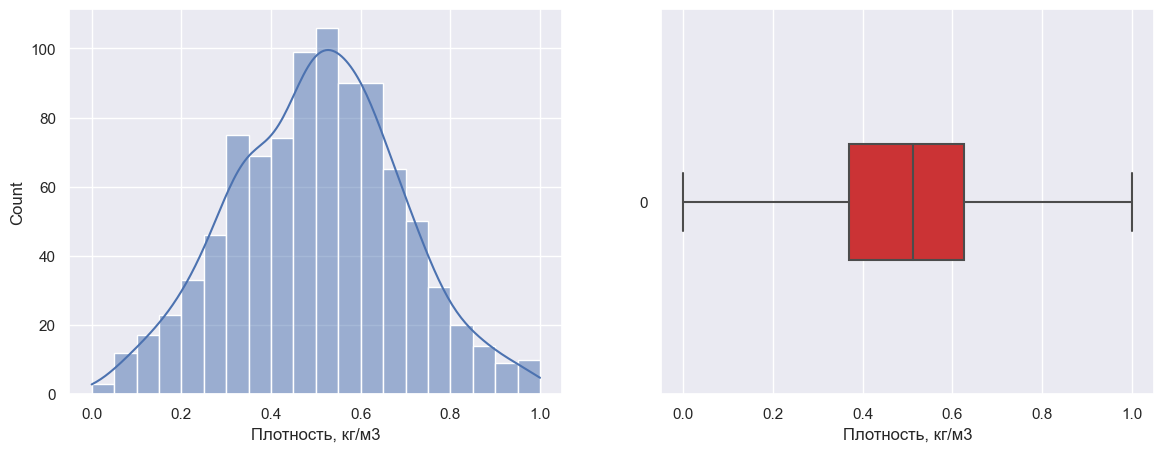

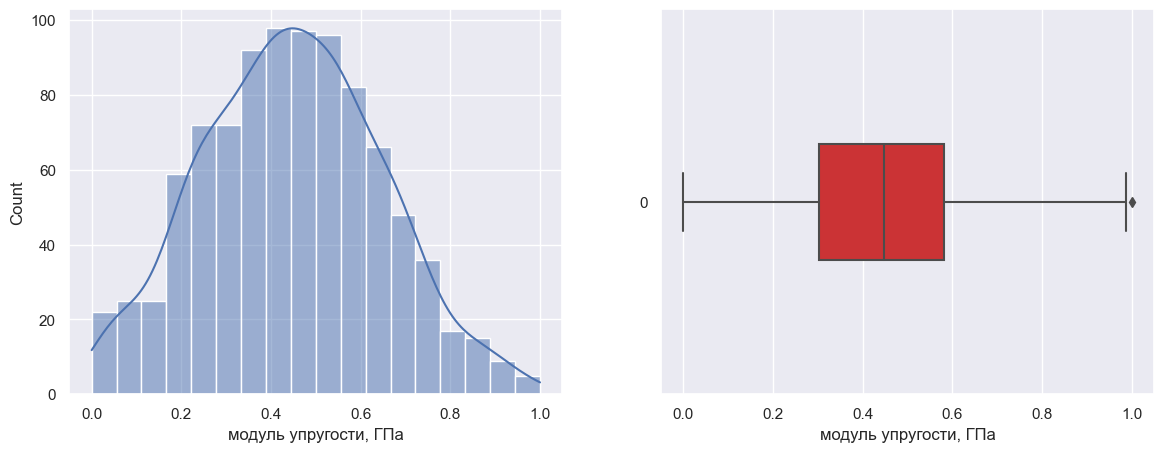

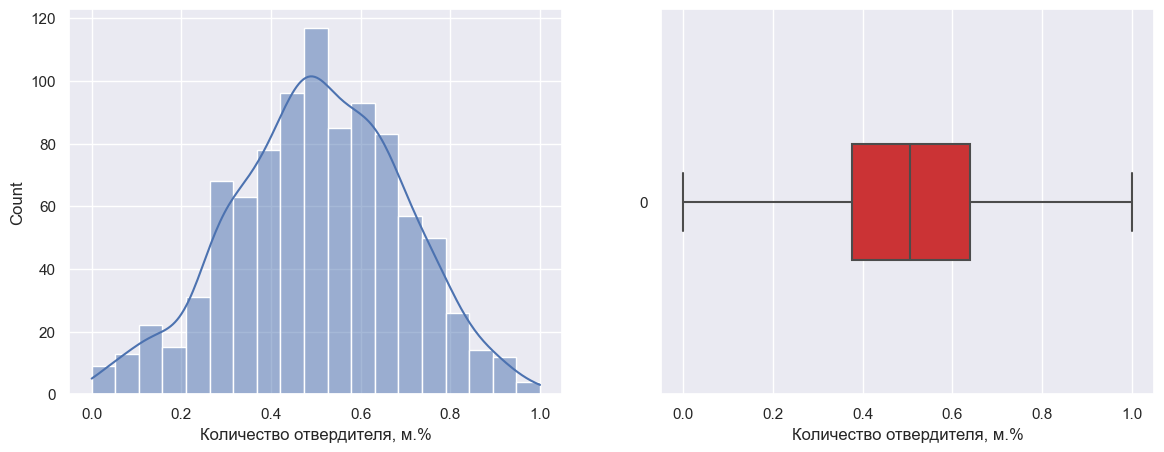

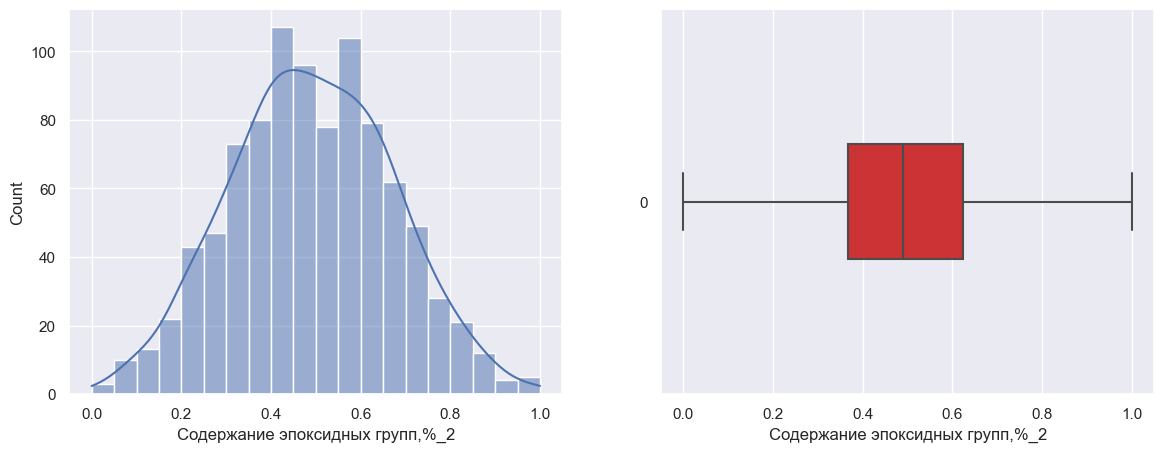

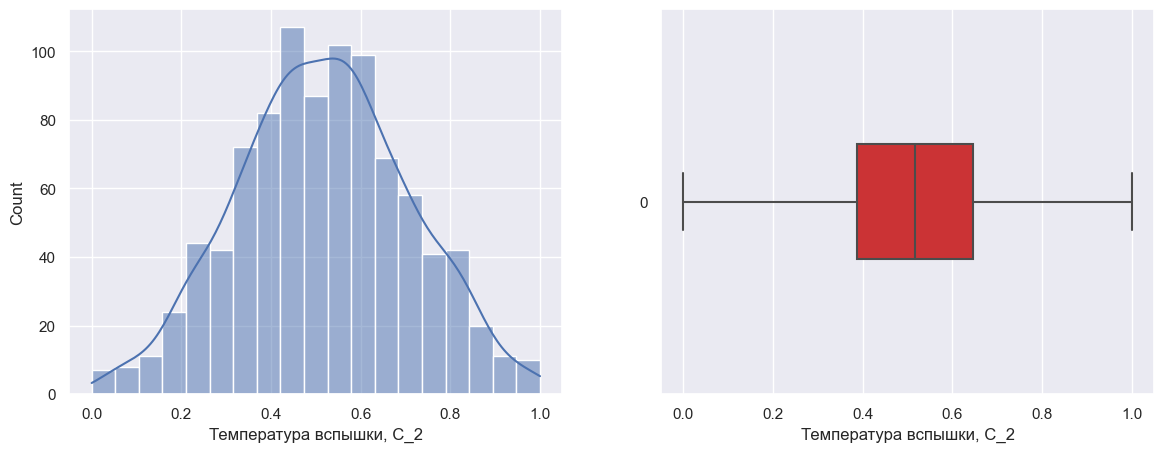

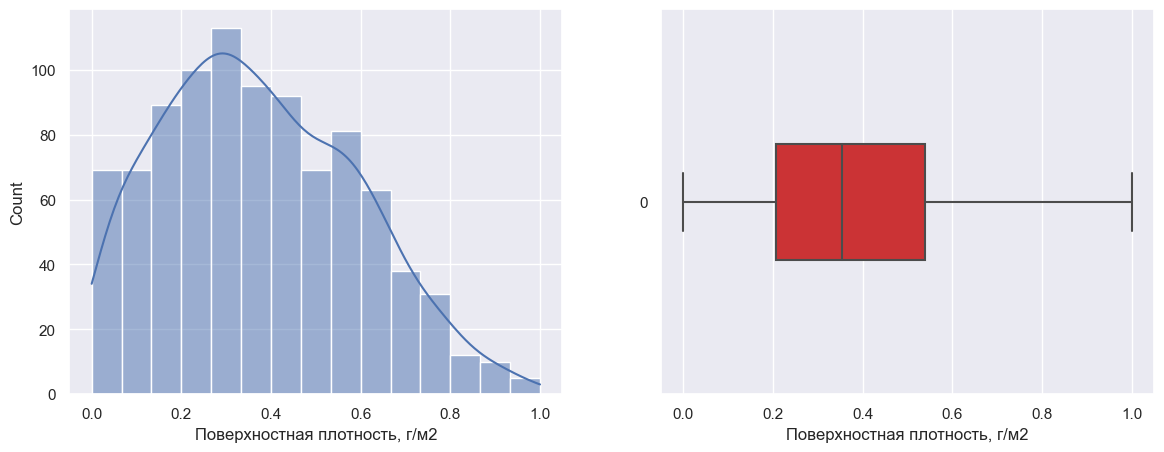

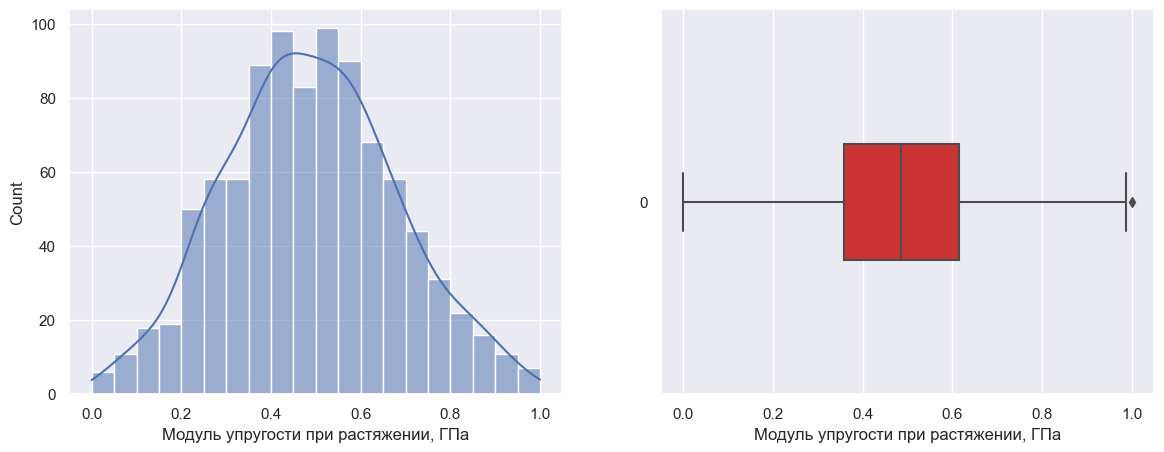

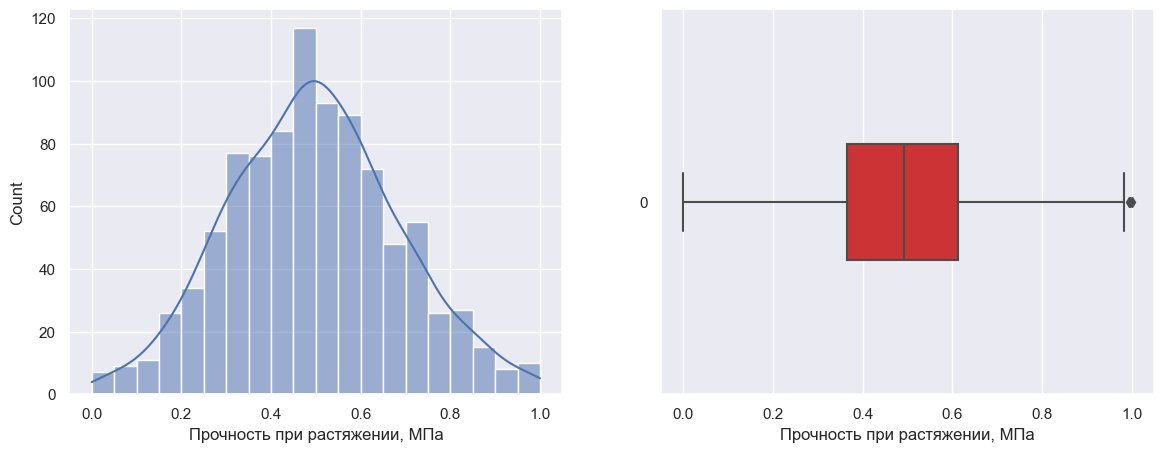

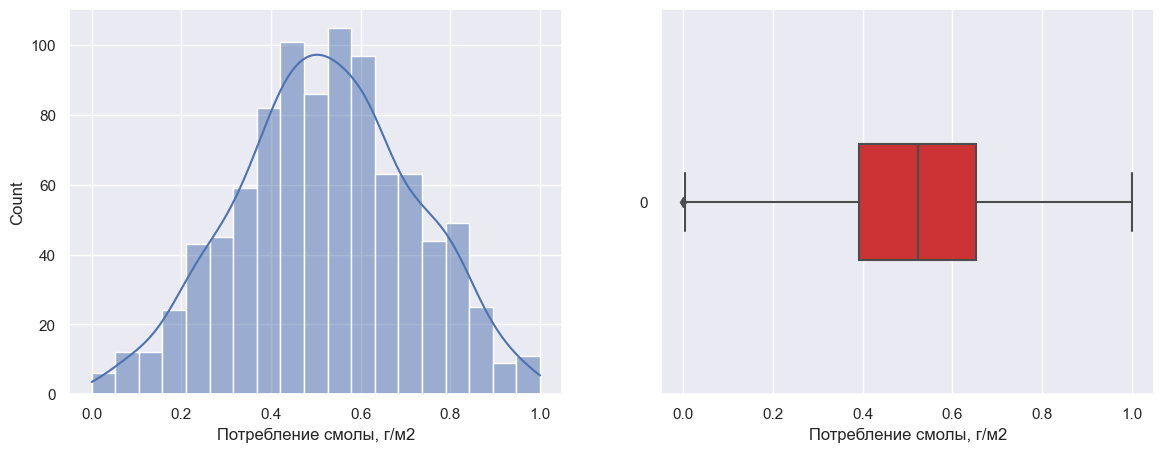

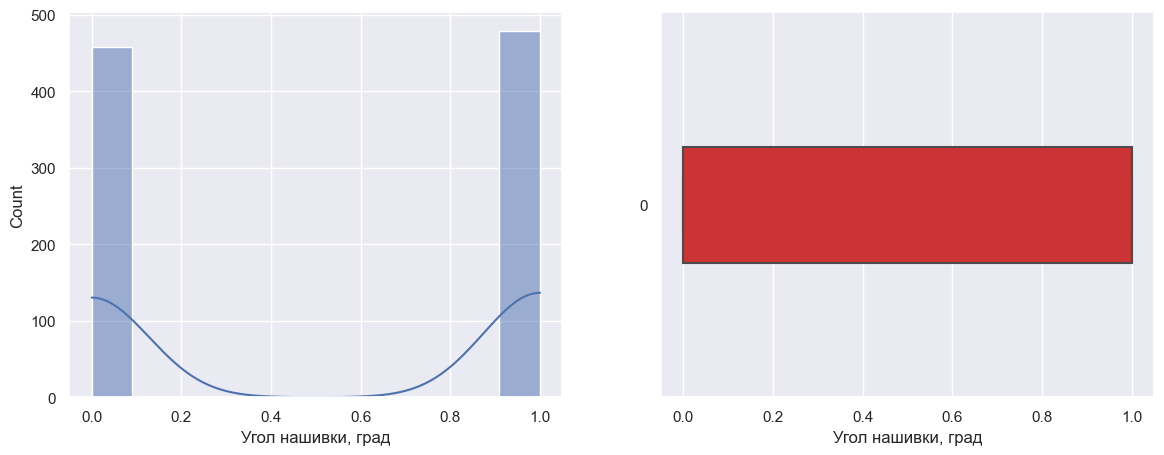

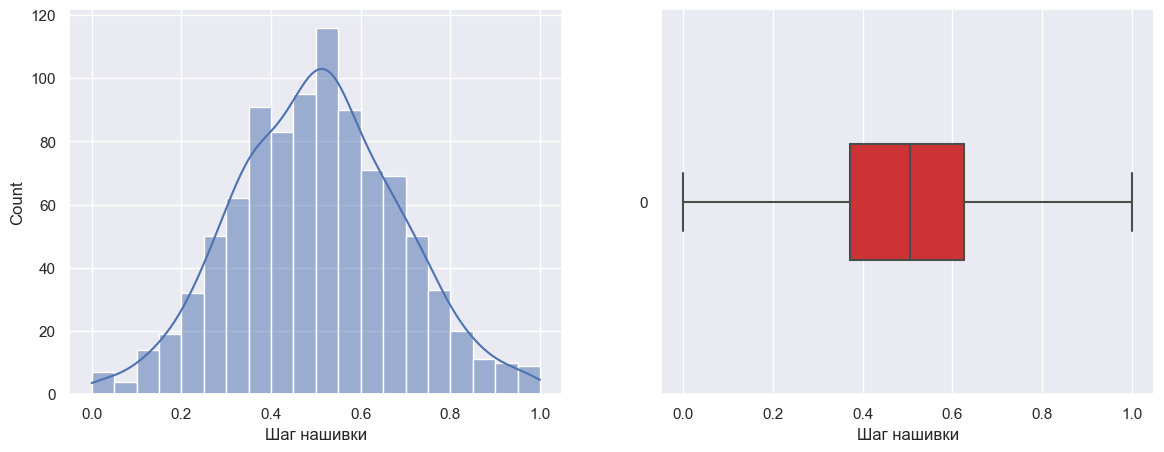

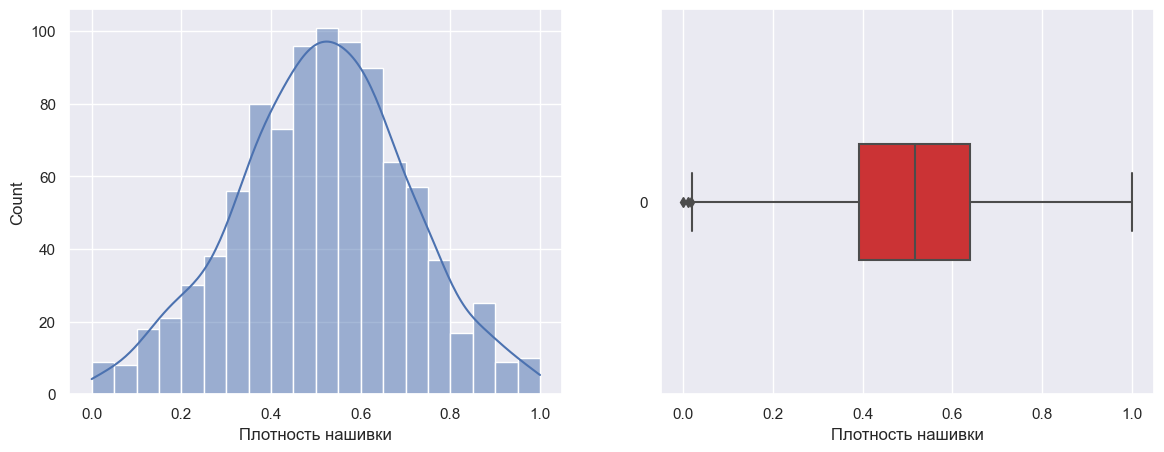

In [18]:
#отрисовка распределения и диаграммы ящика с усами для каждого показателя 
data_hist_boxplot_func(zbc_dataset)

<AxesSubplot:ylabel='Density'>

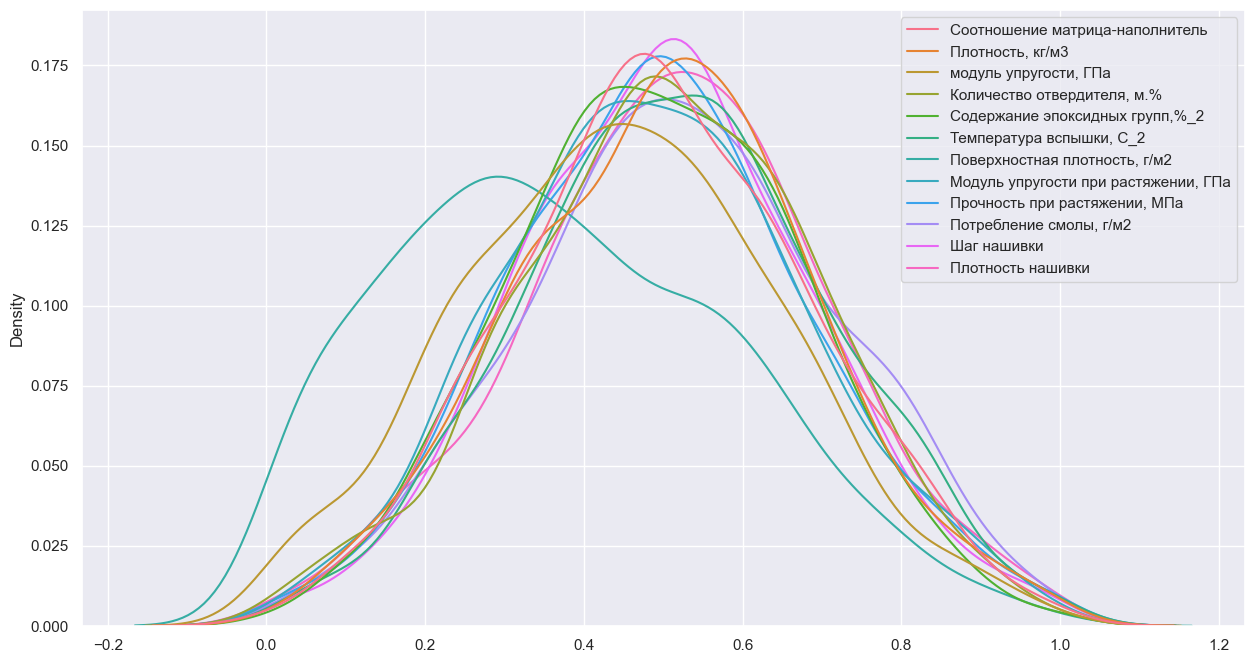

In [19]:
# Норм.данные
sns.set(font_scale=1)
plt.figure(figsize = (15,8))
sns.kdeplot(data=zbc_dataset.drop(labels='Угол нашивки, град', axis = 1)) # угол не расматриваем

In [20]:
#функция для модели 
def ml_model_func (regressor, param_grid_func, data, y_features):

  for y_feature in y_features:

    data_labels = data.drop(y_feature, axis=1).columns

    # Разбиение данных на обучающую и тестовую выборки
    y = np.array(data[y_feature])
    X = np.array(data.drop(y_feature, axis=1))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 15)

    print('\nПостроение модели для параметра ', f"'{y_feature}'")

    #Проверка размерности выборок
    print('\nРазмерность выборок\n')
    print('X_train  :', X_train.shape)
    print('y_train  :', y_train.shape)
    print('X_test   :', X_test.shape)
    print('y_test   :', y_test.shape)

    #Создание модели и подбор параметров
    regr = regressor 
    
    print('\nПодбор параметров модели')
    regr_grid_search = GridSearchCV(estimator = regr, 
                              param_grid = param_grid, 
                              cv=10,
                              verbose=True, n_jobs=-1).fit(X_train, y_train)
    
    # Определение лучших параметров
    regr_best = regr_grid_search.best_estimator_  
    print(f"\nЛучшие параметры модели: '{regr_best}'")

    # Предсказание ответов на тестовых данных
    y_pred = regr_best.predict(X_test)   
    
    # Отрисовка результата
    print('\nРезультат обучения модели')
    plt.figure(figsize=(10,5))
    plt.scatter(range(0, len(y_test)), y_test, label = 'data', s =20)
    plt.plot(range(0, len(y_test)), y_pred, label = 'predict', color = 'green')
    plt.title(str(y_feature))
    plt.legend()
    plt.ylabel("Значение")
    plt.xlabel("Элементы выборки")
    plt.show()
    
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=y_pred, label = 'y_pred')
    sns.kdeplot(data=y_test, label = 'y_test')
    plt.xlabel("Значение")
    plt.legend()  
    plt.show()

    print('Среднеквадратическая ошибка: %.4f' % mean_squared_error(y_test, y_pred))
    print('Средняя абсолютная ошибка: %.4f' % mean_absolute_error(y_test, y_pred))
    print('Коэффициент детерминации: ', r2_score(y_test, y_pred))

    #print(f"\n\nПрогнозирование зависимости параметра {y_feature} от остальных параметров")
    #for i in range(0, X_test.shape[1]):
      #print('\n')
      #plt.figure(figsize=(10,5))
      #plt.scatter(X_test[:,i], y_test, label = 'data', s =20)
      #plt.scatter(X_test[:,i], y_pred, label = 'predict', color = 'green', s =20)
      #plt.title(f"Прогнозирование зависимости параметра {y_feature} от {data_labels[i]}")
      #plt.ylabel(f"{y_feature}")
      #plt.xlabel(f"{data_labels[i]}")
      #plt.legend()
      #plt.show()      


Построение модели для параметра  'Прочность при растяжении, МПа'

Размерность выборок

X_train  : (655, 12)
y_train  : (655,)
X_test   : (281, 12)
y_test   : (281,)

Подбор параметров модели
Fitting 10 folds for each of 4 candidates, totalling 40 fits

Лучшие параметры модели: 'LinearRegression()'

Результат обучения модели


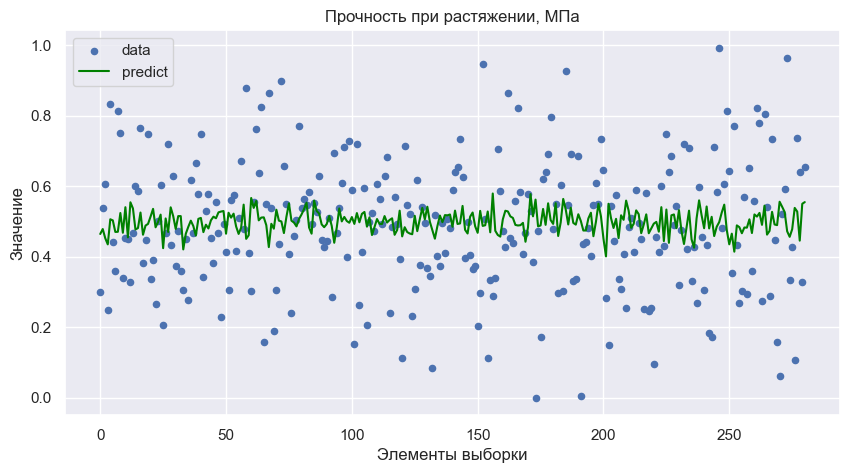

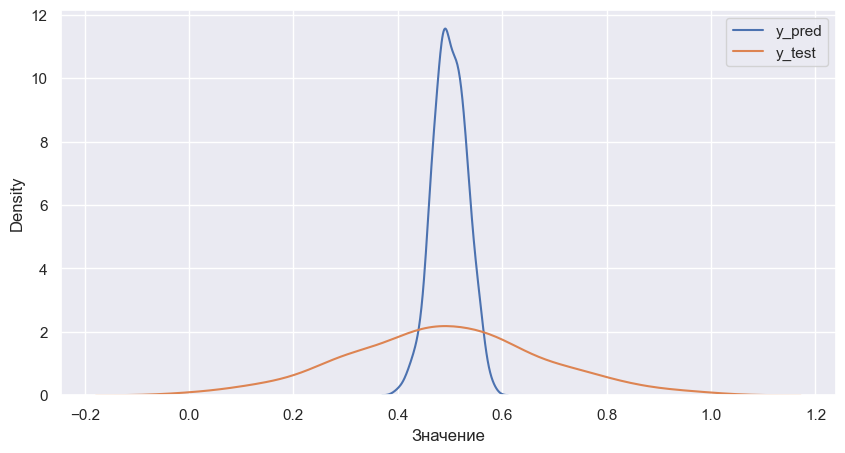

Среднеквадратическая ошибка: 0.0344
Средняя абсолютная ошибка: 0.1446
Коэффициент детерминации:  -0.025858041763724637

Построение модели для параметра  'Модуль упругости при растяжении, ГПа'

Размерность выборок

X_train  : (655, 12)
y_train  : (655,)
X_test   : (281, 12)
y_test   : (281,)

Подбор параметров модели
Fitting 10 folds for each of 4 candidates, totalling 40 fits

Лучшие параметры модели: 'LinearRegression(positive=True)'

Результат обучения модели


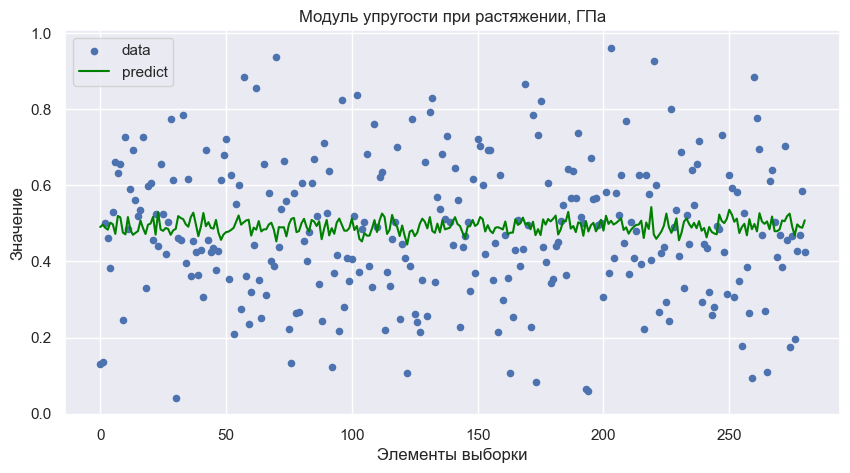

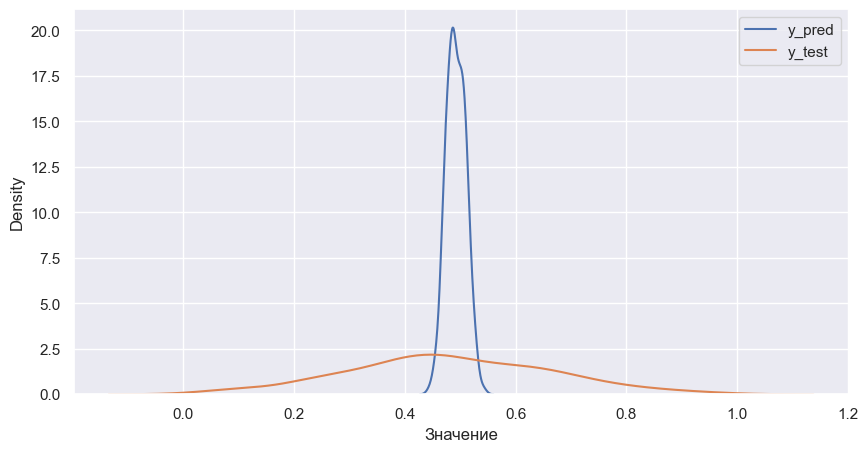

Среднеквадратическая ошибка: 0.0328
Средняя абсолютная ошибка: 0.1456
Коэффициент детерминации:  0.0037936045133483143


In [21]:
# Линейная регрессия без полиномиальных параметров
param_grid = {'fit_intercept': [True, False],
                'positive': [False, True]}
                
ml_model_func(LinearRegression(), param_grid, 
              zbc_dataset, ['Прочность при растяжении, МПа', 'Модуль упругости при растяжении, ГПа'])


Проверка размерности выборок для показателя  ' Прочность при растяжении, МПа '
X_train  : (655, 12)
y_train  : (655,)
X_test   : (281, 12)
y_test   : (281,)

X_trainP  : (655,)
X_testP   : (281,) 


Подбор параметров модели
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Лучшие параметры модели:  LinearRegression(positive=True)

Результат обучения модели


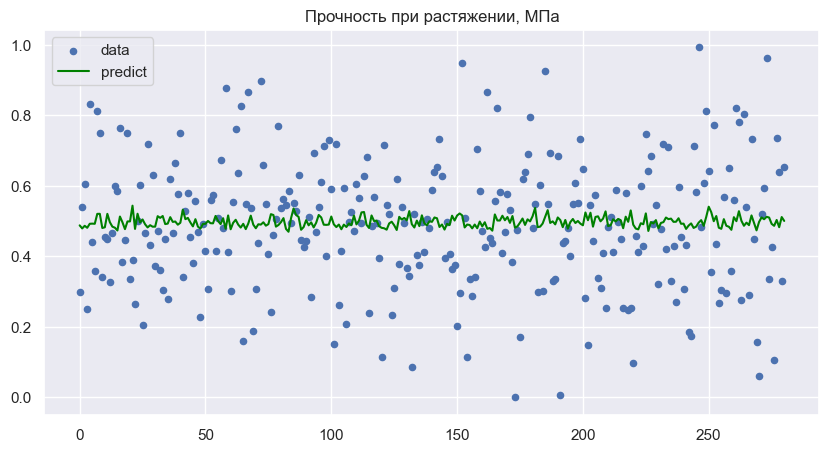

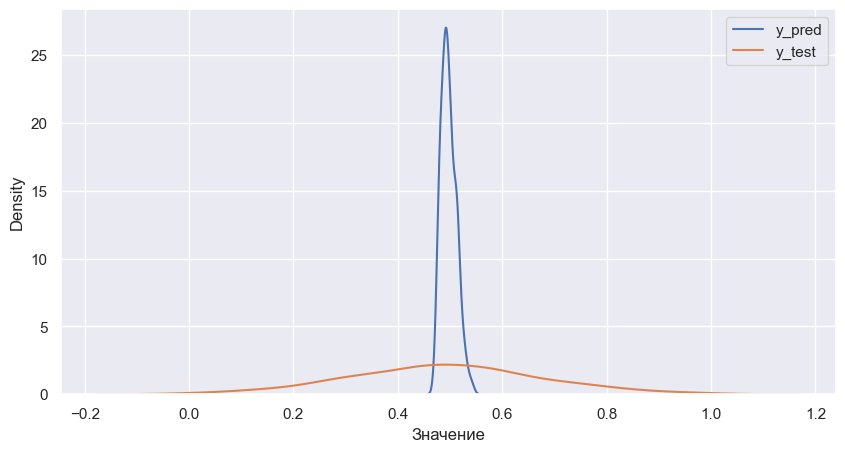

Среднеквадратическая ошибка: 0.0333
Средняя абсолютная ошибка: 0.1441
Коэффициент детерминации:  0.0062684142884992244

Проверка размерности выборок для показателя  ' Модуль упругости при растяжении, ГПа '
X_train  : (655, 12)
y_train  : (655,)
X_test   : (281, 12)
y_test   : (281,)

X_trainP  : (655,)
X_testP   : (281,) 


Подбор параметров модели
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Лучшие параметры модели:  LinearRegression(positive=True)

Результат обучения модели


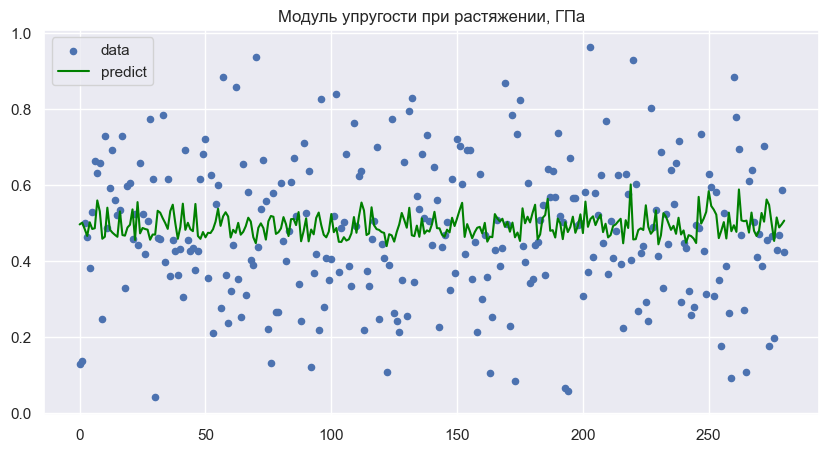

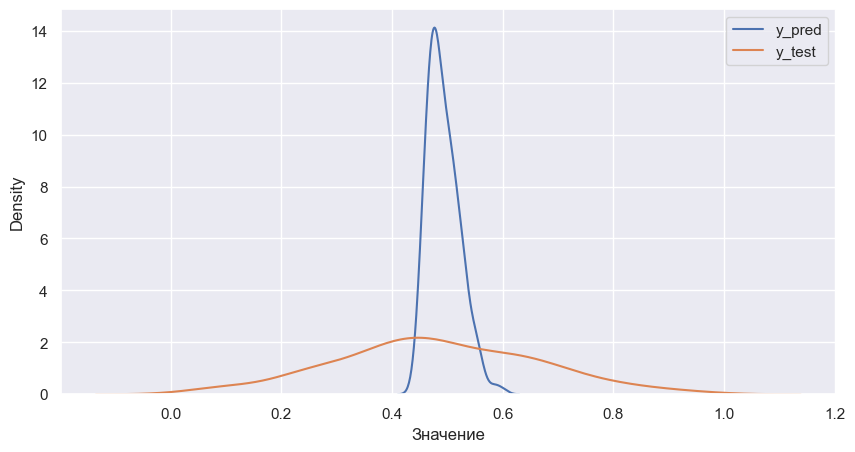

Среднеквадратическая ошибка: 0.0332
Средняя абсолютная ошибка: 0.1460
Коэффициент детерминации:  -0.006984976626581485


In [22]:
#  Линейная регрессия с полиномиальными параметрами


y_features = ['Прочность при растяжении, МПа', 
              'Модуль упругости при растяжении, ГПа']

for y_feature in y_features:

  data_labels = zbc_dataset.drop(y_feature, axis=1).columns

  y = np.array(zbc_dataset[y_feature])
  X = np.array(zbc_dataset.drop(y_feature, axis=1))

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 15)

  #Применение полиномиальных параметров 
  X_trainP = PolynomialFeatures(degree=3).fit_transform(X_train)
  X_testP = PolynomialFeatures(degree=3).fit_transform(X_test)

  
  print('\nПроверка размерности выборок для показателя ', "'",str(y_feature),"'")
  print('X_train  :', X_train.shape)
  print('y_train  :', y_train.shape)
  print('X_test   :', X_test.shape)
  print('y_test   :', y_test.shape)
  print('\nX_trainP  :', y_train.shape)
  print('X_testP   :', y_test.shape, '\n')

  
  regr = LinearRegression() #Создание модели и определение предлагаемых параметров
  param_grid = {'fit_intercept': [True, False],
                'positive': [False, True]}

  print('\nПодбор параметров модели')
  regr_grid_search = GridSearchCV(estimator = regr, #подбор параметров на обучающей выборке
                            param_grid = param_grid, 
                            cv=10,
                            verbose=True, n_jobs=-1).fit(X_trainP, y_train)

  regr_best = regr_grid_search.best_estimator_  # Определяем лучшие параметры
  print('Лучшие параметры модели: ', regr_best)

  y_pred = regr_best.predict(X_testP)   # Предсказание ответов на тестовых данных
  
  # Отрисовка результата
  print('\nРезультат обучения модели')
  plt.figure(figsize=(10,5))
  plt.scatter(range(0, len(y_test)), y_test, label = 'data', s =20)
  plt.plot(range(0, len(y_test)), y_pred, label = 'predict', color = 'green')
  plt.title(str(y_feature))
  plt.legend()
  plt.show()

  plt.figure(figsize=(10,5))
  sns.kdeplot(data=y_pred, label = 'y_pred')
  sns.kdeplot(data=y_test, label = 'y_test')
  plt.xlabel("Значение")
  plt.legend()  
  plt.show()
  print('Среднеквадратическая ошибка: %.4f' % mean_squared_error(y_test, y_pred))
  print('Средняя абсолютная ошибка: %.4f' % mean_absolute_error(y_test, y_pred))
  print('Коэффициент детерминации: ', r2_score(y_test, y_pred))
  
  #print(f"\n\nПрогнозирование зависимости параметра {y_feature} от остальных параметров")
  #for i in range(0, X_test.shape[1]):
    #print('\n')
    #plt.figure(figsize=(10,5))
    #plt.scatter(X_test[:,i], y_test, label = 'data', s =20)
    #plt.scatter(X_test[:,i], y_pred, label = 'predict', color = 'green')
    #plt.ylabel(f"{y_feature}")
    #plt.xlabel(f"{data_labels[i]}")
    #plt.legend()
    #plt.show()

In [23]:
X_test.shape[1]

12


Построение модели для параметра  'Прочность при растяжении, МПа'

Размерность выборок

X_train  : (655, 12)
y_train  : (655,)
X_test   : (281, 12)
y_test   : (281,)

Подбор параметров модели
Fitting 10 folds for each of 36 candidates, totalling 360 fits

Лучшие параметры модели: 'RandomForestRegressor(criterion='absolute_error', max_depth=5, max_features=3,
                      n_jobs=-1, warm_start=True)'

Результат обучения модели


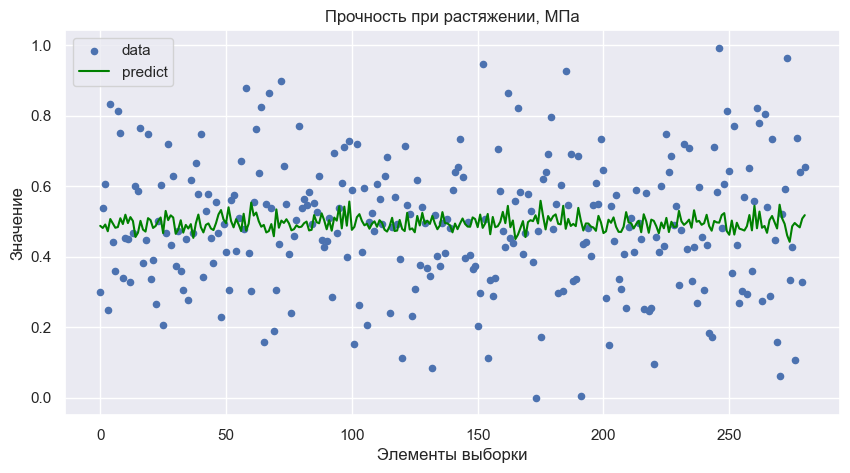

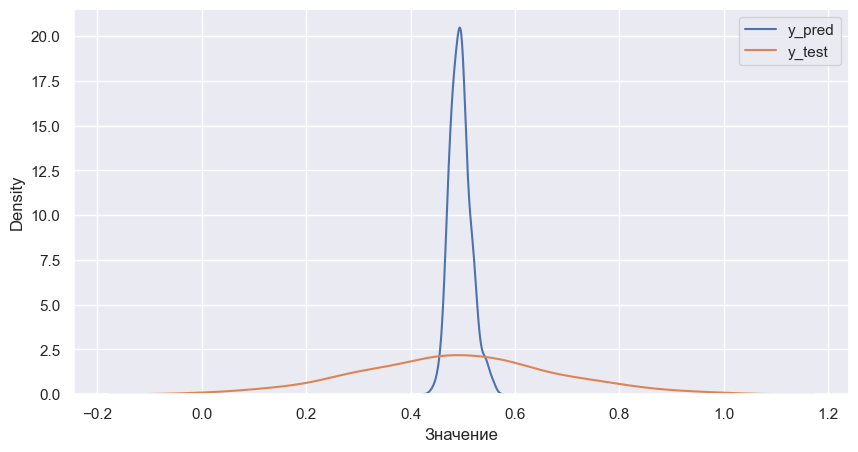

Среднеквадратическая ошибка: 0.0342
Средняя абсолютная ошибка: 0.1452
Коэффициент детерминации:  -0.019791919350315323

Построение модели для параметра  'Модуль упругости при растяжении, ГПа'

Размерность выборок

X_train  : (655, 12)
y_train  : (655,)
X_test   : (281, 12)
y_test   : (281,)

Подбор параметров модели
Fitting 10 folds for each of 36 candidates, totalling 360 fits

Лучшие параметры модели: 'RandomForestRegressor(max_depth=5, max_features=3, n_estimators=50, n_jobs=-1,
                      warm_start=True)'

Результат обучения модели


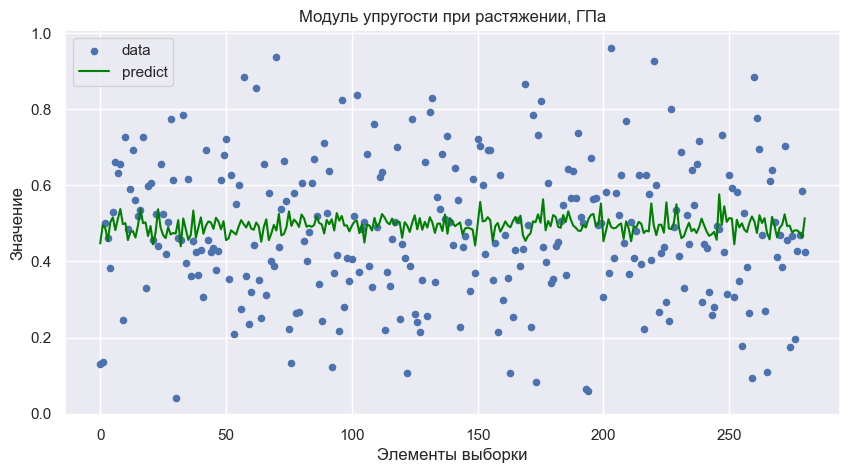

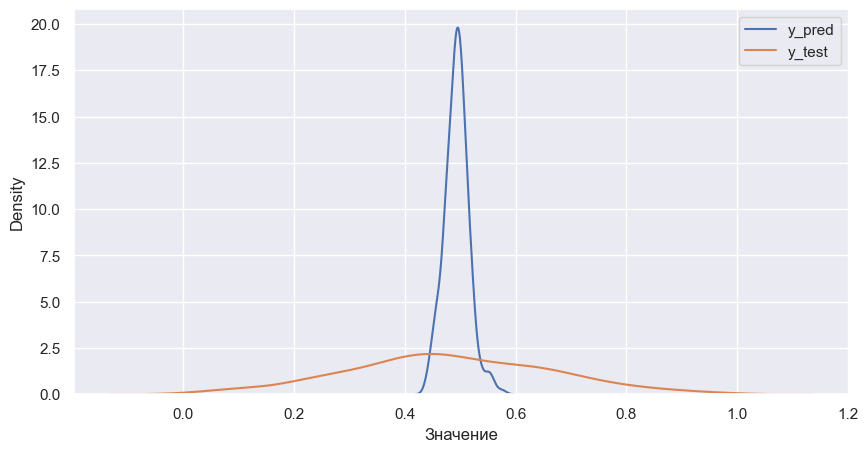

Среднеквадратическая ошибка: 0.0332
Средняя абсолютная ошибка: 0.1467
Коэффициент детерминации:  -0.00802739167527311


In [24]:
# Случайный лес
param_grid = {'n_estimators': [10, 50, 100], 
              'criterion':   ["squared_error", "absolute_error"], 
              'max_depth':   [5, 15],
              'max_features': [3, 4, 12],
              'warm_start': [True],
              'n_jobs': [-1], 
              }
                
ml_model_func(RandomForestRegressor(), param_grid, zbc_dataset, 
              ['Прочность при растяжении, МПа', 'Модуль упругости при растяжении, ГПа'])


Построение модели для параметра  'Прочность при растяжении, МПа'

Размерность выборок

X_train  : (655, 12)
y_train  : (655,)
X_test   : (281, 12)
y_test   : (281,)

Подбор параметров модели
Fitting 10 folds for each of 12 candidates, totalling 120 fits

Лучшие параметры модели: 'KNeighborsRegressor(n_jobs=-1, n_neighbors=150, p=1, weights='distance')'

Результат обучения модели


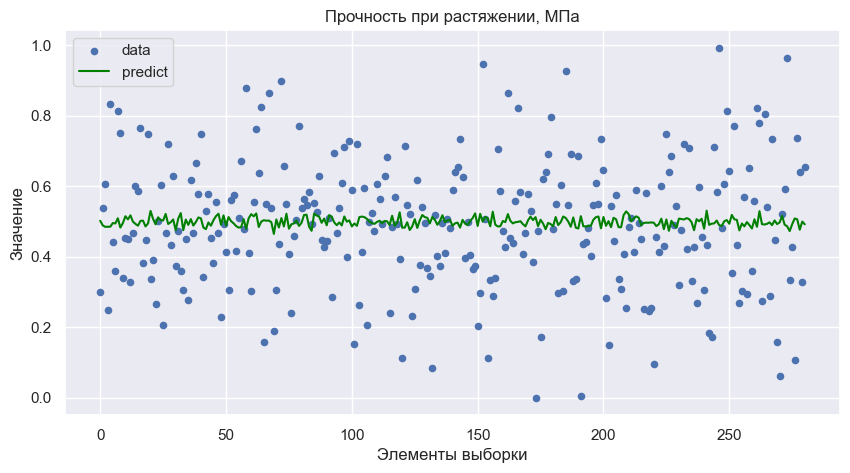

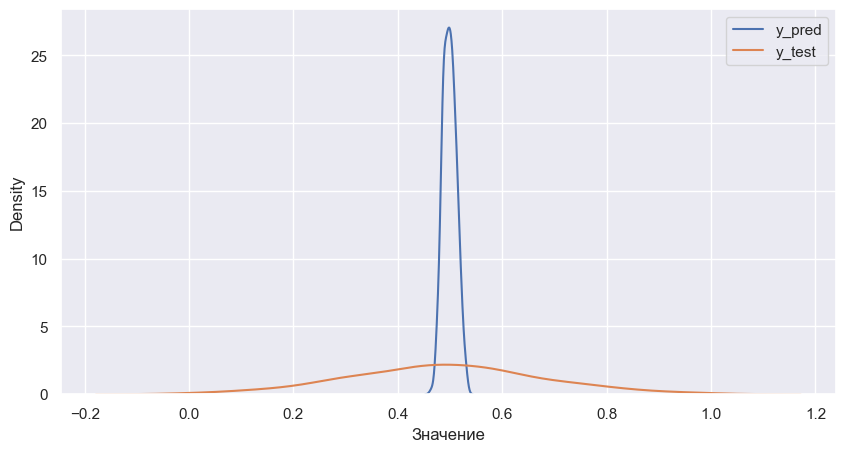

Среднеквадратическая ошибка: 0.0340
Средняя абсолютная ошибка: 0.1456
Коэффициент детерминации:  -0.01369632127961018

Построение модели для параметра  'Модуль упругости при растяжении, ГПа'

Размерность выборок

X_train  : (655, 12)
y_train  : (655,)
X_test   : (281, 12)
y_test   : (281,)

Подбор параметров модели
Fitting 10 folds for each of 12 candidates, totalling 120 fits

Лучшие параметры модели: 'KNeighborsRegressor(n_jobs=-1, n_neighbors=150, p=1)'

Результат обучения модели


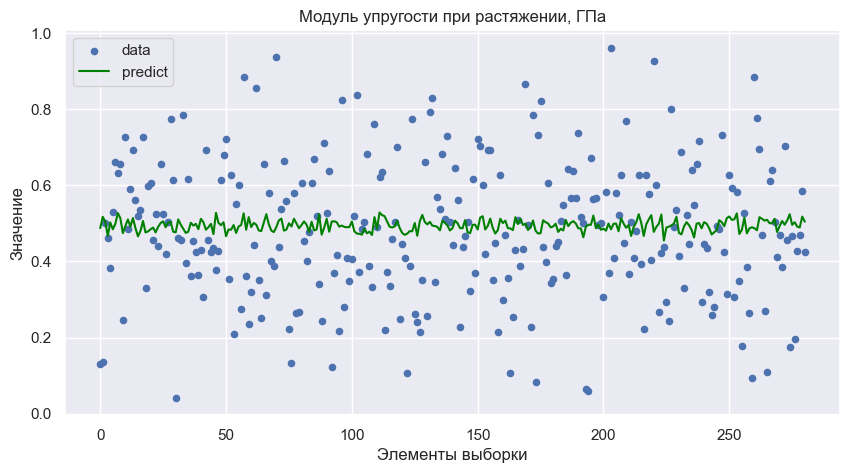

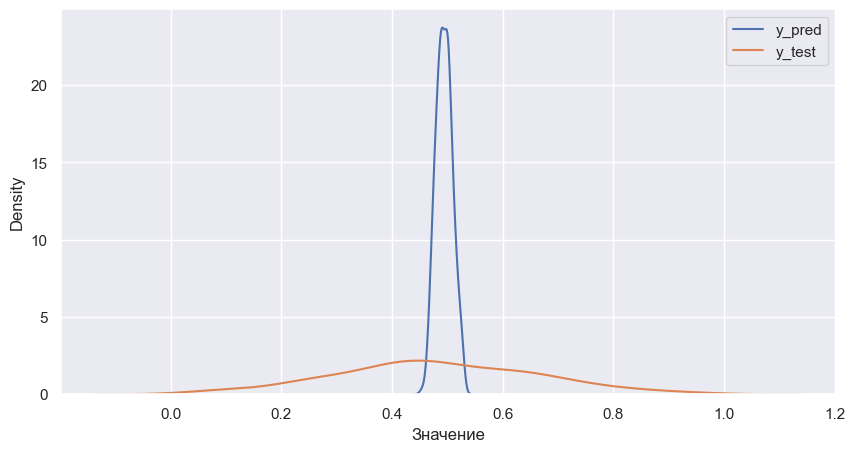

Среднеквадратическая ошибка: 0.0330
Средняя абсолютная ошибка: 0.1458
Коэффициент детерминации:  0.00021269766052234296


In [25]:
#  Модель K-ближайших соседей KNeighborsRegressor
param_grid = {'n_neighbors': [5, 50, 150],
              'weights':   ['uniform', 'distance'], 
              'p': [1,2],
              'metric': ["minkowski"],
              'n_jobs':[-1]
                }
                
ml_model_func(KNeighborsRegressor(), param_grid, 
              zbc_dataset, ['Прочность при растяжении, МПа', 'Модуль упругости при растяжении, ГПа'])

In [26]:
# Нейронная сеть
def nn_model_1 (y_features, data_set):
 
  for y_feature in y_features:
  
    #разбивка датасета на тренировочную и тестовую выборки (70/30)
    y = np.array(data_set[y_feature])
    X = np.array(data_set.drop(y_feature, axis=1))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

    #модель нейронной сети
    nn_model = tf.keras.Sequential([ 
          layers.Dense(input_shape = (X_train.shape[1],), units=12, activation='relu'),  
          layers.Dense(units=6,activation='relu'),
          layers.Dropout(0.2),
          layers.Dense(units=1, activation='linear')])
    
    print(nn_model.summary()) 

    #компиляция
    nn_model.compile(loss='mae', optimizer=tf.optimizers.Adam(learning_rate=0.0035))
    
    history = nn_model.fit(X_train, y_train,
                          epochs=20, 
                          verbose=0, 
                          validation_split = 0.2, 
                          batch_size=45,
                          validation_data = (X_test, y_test))
    
    y_pred = nn_model.predict(X_test)
    
    plt.figure(figsize=(10,5))
    plt.title(str(y_feature))
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #plt.ylim([0,0.4])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

    print("\nОценка модели: ", nn_model.evaluate(X_test, y_test, verbose=1))

    # Отрисовка результата
    print('\nРезультат отработки модели')
    plt.figure(figsize=(10,5))
    plt.scatter(range(0, len(y_test)), y_test, label = 'data', s =20)
    plt.plot(range(0, len(y_test)), y_pred, label = 'predict', color = 'green')
    plt.title(str(y_feature))
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=y_pred, label = 'y_pred', color='b')
    sns.kdeplot(data=y_test, label = 'y_test', color='orange')
    plt.xlabel("Значение")
    plt.legend()  
    plt.show()
    
    
    print('Среднеквадратическая ошибка: %.5f' % mean_squared_error(y_test, y_pred))
    print('Средняя абсолютная ошибка: %.5f' % mean_absolute_error(y_test, y_pred))
    print('Коэффициент детерминации: ', r2_score(y_test, y_pred), '\n')
    
  return

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________
None
9/9 [==============================] - 0s 1ms/step - loss: 0.1456

Оценка модели:  0.14556585252285004

Результат отработки модели


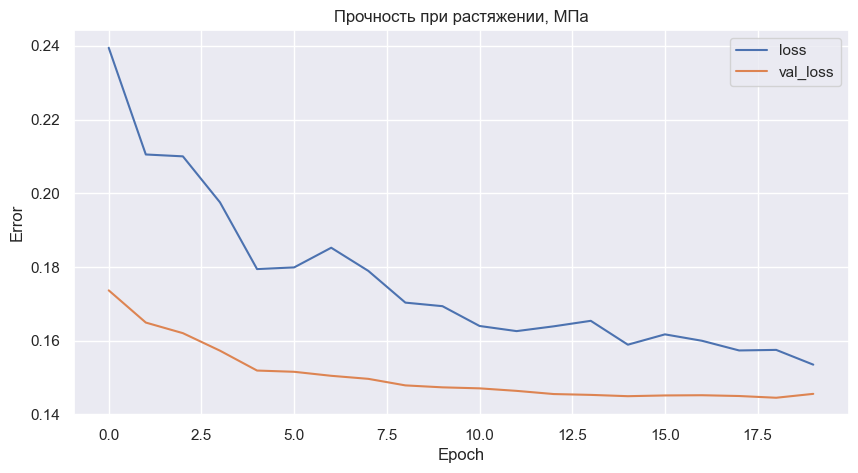

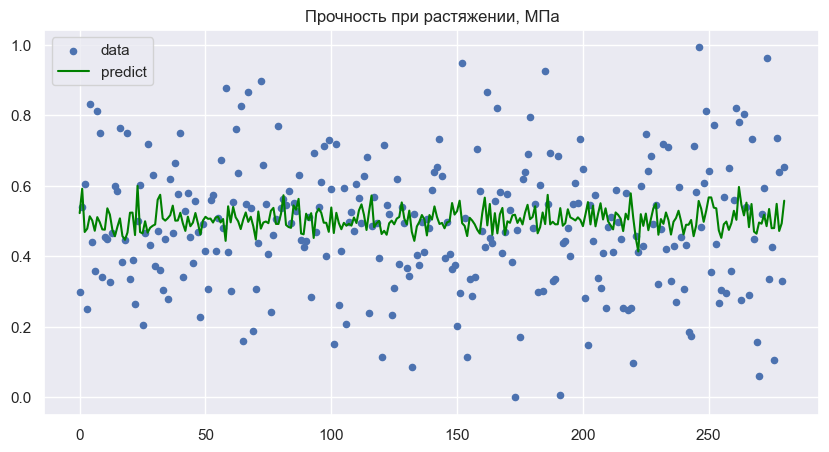

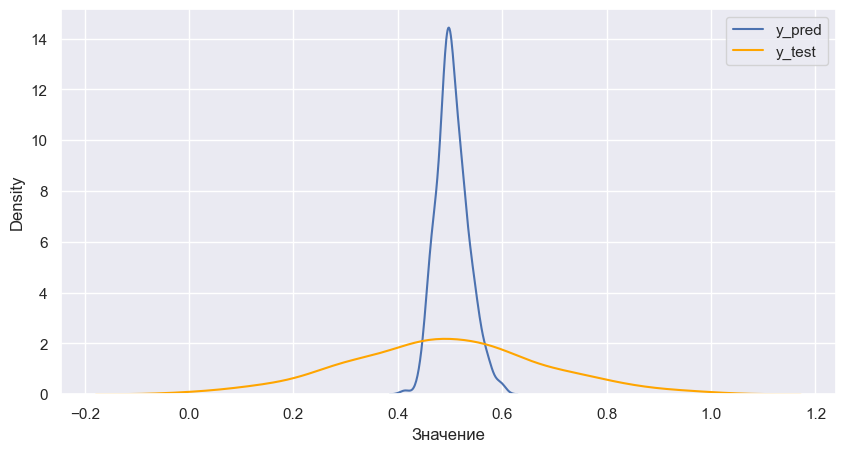

Среднеквадратическая ошибка: 0.03419
Средняя абсолютная ошибка: 0.14557
Коэффициент детерминации:  -0.018740801567630916 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________
None
9/9 [==============================] - 0s 2ms/step - loss: 0

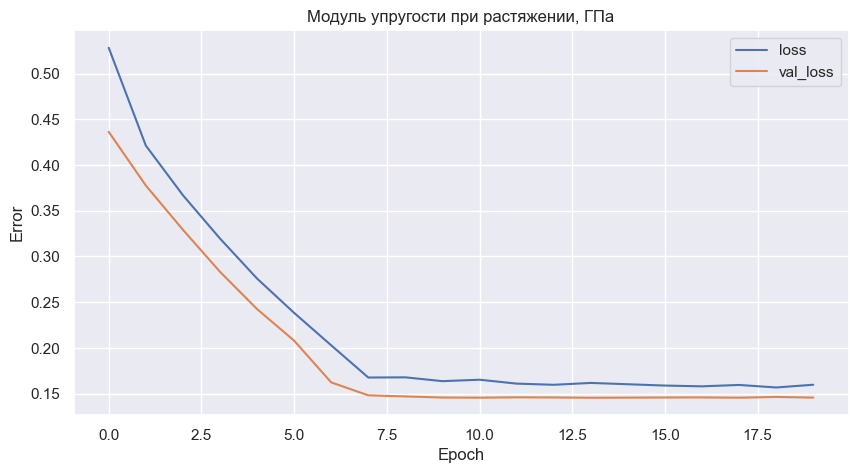

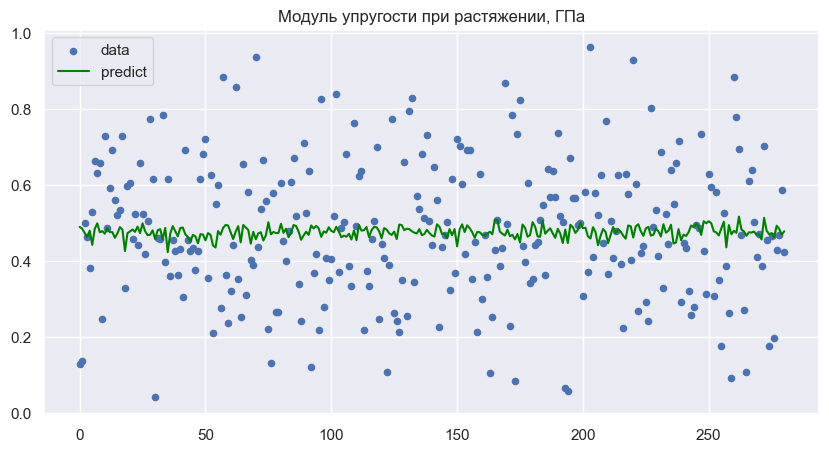

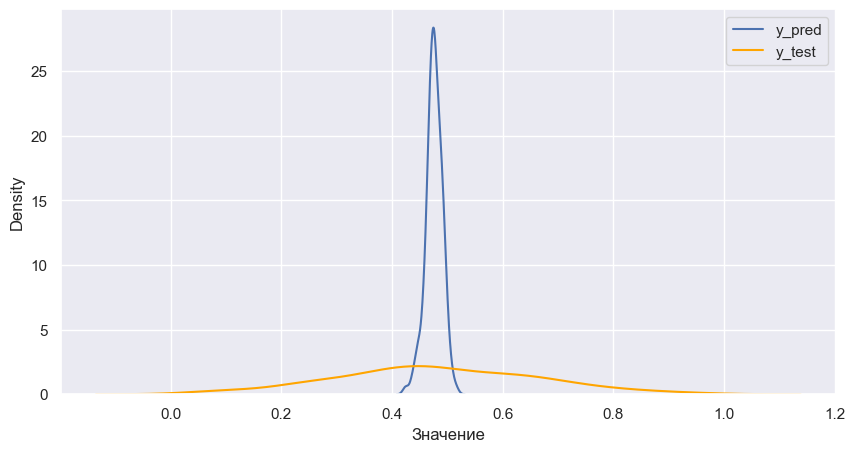

Среднеквадратическая ошибка: 0.03335
Средняя абсолютная ошибка: 0.14574
Коэффициент детерминации:  -0.011824818192490705 



In [27]:
nn_model_1 (['Прочность при растяжении, МПа', 'Модуль упругости при растяжении, ГПа'], zbc_dataset)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                156       
                                                                 
 dense_7 (Dense)             (None, 6)                 78        
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                                 
 dense_8 (Dense)             (None, 6)                 42        
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________
None
9/9 [==============================] - 0s 1ms/step 

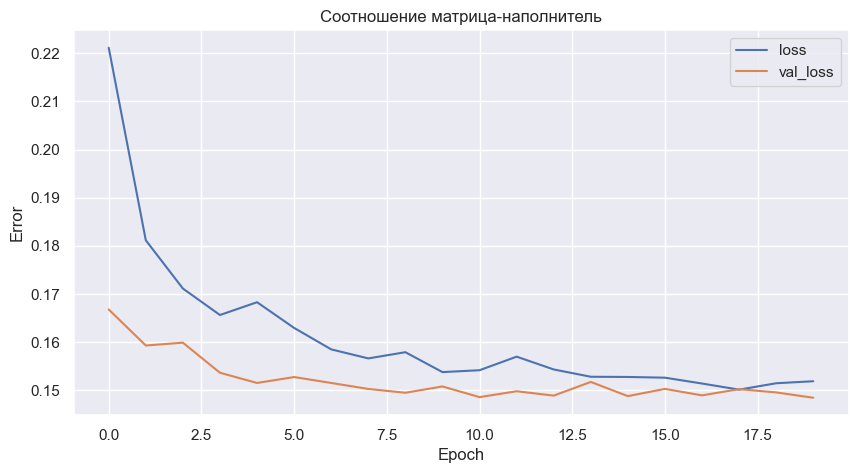

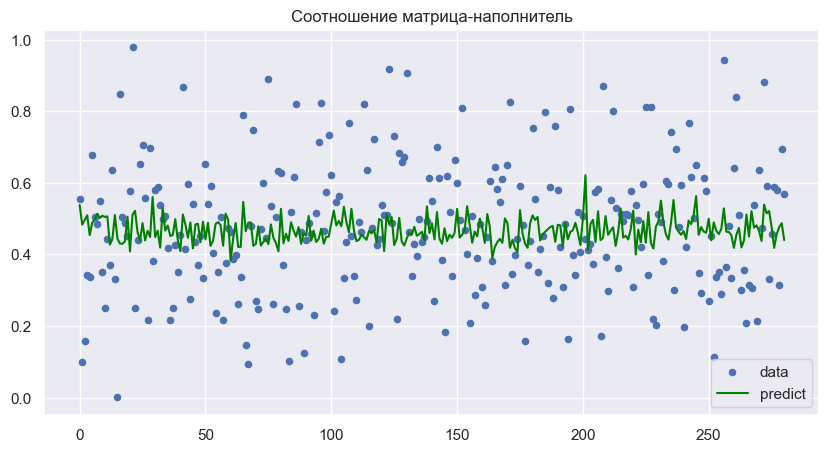

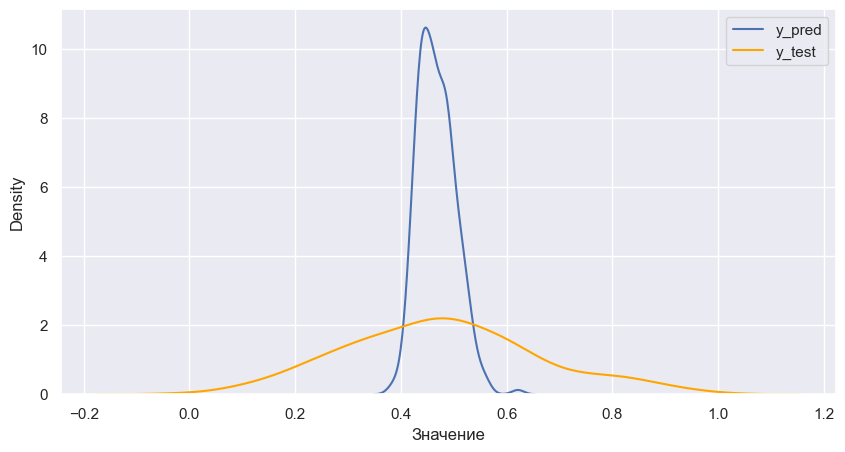

Среднеквадратическая ошибка: 0.03479
Средняя абсолютная ошибка: 0.14843
Коэффициент детерминации:  -0.04556456925579311 



In [28]:
# нейр. "матр.-наполнитель"
#разбивка датасета на тренировочную и тестовую выборки (70/30)
y = np.array(zbc_dataset['Соотношение матрица-наполнитель'])
X = np.array(zbc_dataset.drop('Соотношение матрица-наполнитель', axis=1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

#модель нейронной сети
nn_model2 = tf.keras.Sequential([ 
layers.Dense(input_shape = (X_train.shape[1],), units=12, activation='relu'),  
layers.Dense(units=6,activation='relu'),
layers.Dropout(0.2),
layers.Dense(units=6, activation='relu'),
layers.Dense(units=1, activation='linear')])
    
print(nn_model2.summary()) 

#компиляция
nn_model2.compile(loss='mae', optimizer=tf.optimizers.Adam(learning_rate=0.0035))
    
history = nn_model2.fit(X_train, y_train,
                          epochs=20, 
                          verbose=0, 
                          validation_split = 0.3, 
                          batch_size=45,
                          validation_data = (X_test, y_test))
    
y_pred = nn_model2.predict(X_test)
    
plt.figure(figsize=(10,5))
plt.title(str('Соотношение матрица-наполнитель'))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
#plt.ylim([0,0.4])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

print("\nОценка модели: ", nn_model2.evaluate(X_test, y_test, verbose=1))

# Отрисовка результата
print('\nРезультат отработки модели')
plt.figure(figsize=(10,5))
plt.scatter(range(0, len(y_test)), y_test, label = 'data', s =20)
plt.plot(range(0, len(y_test)), y_pred, label = 'predict', color = 'green')
plt.title(str('Соотношение матрица-наполнитель'))
plt.legend()
plt.show()
    
plt.figure(figsize=(10,5))
sns.kdeplot(data=y_pred, label = 'y_pred', color='b')
sns.kdeplot(data=y_test, label = 'y_test', color='orange')
plt.xlabel("Значение")
plt.legend()  
plt.show()
    
    
print('Среднеквадратическая ошибка: %.5f' % mean_squared_error(y_test, y_pred))
print('Средняя абсолютная ошибка: %.5f' % mean_absolute_error(y_test, y_pred))
print('Коэффициент детерминации: ', r2_score(y_test, y_pred), '\n')

In [ ]:
# print("Введите параметры для прогноза соотношения 'Матрица-наполнитель'")
print("Плотность, кг/м3")
z1 = np.float64(input())
print("Модуль упругости, ГПа")
z2 = np.float64(input())
print("Количество отвердителя, м.%")
z3 = np.float64(input())
print("Содержание эпоксидных групп,%_2")
z4 = np.float64(input())
print("Температура вспышки, С_2")
z5 = np.float64(input())
print("Поверхностная плотность, г/м2")
z6 = np.float64(input())
print("Модуль упругости при растяжении, ГПа")
z7 = np.float64(input())
print("Прочность при растяжении, МПа")
z8 = np.float64(input())
print("Потребление смолы, г/м2")
z9 = np.float64(input())
print("Угол нашивки, град")
z10 = np.float64(input())
print("Шаг нашивки")
z11 = np.float64(input())
print("Плотность нашивки")
z12 = np.float64(input())

args = np.array([[z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12]])

Плотность, кг/м3


In [ ]:
pred = nn_model2.predict(args)

#возвращаем исходный масштаб значения
pred2 = pred * np.max(clean_dataset['Соотношение матрица-наполнитель']) + np.min(clean_dataset['Соотношение матрица-наполнитель'])

print("Рекомендуемое соотношение 'Матрица-наполнитель' =", pred2[0,0])

In [ ]:
# Создание и выгрузка модели для получения прогноза для параметра "Прочность при растяжении" (на основе KNeighborsRegressor)
y = np.array(zbc_dataset['Прочность при растяжении, МПа'])
X = np.array(zbc_dataset.drop('Прочность при растяжении, МПа', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state= 42)

regr = KNeighborsRegressor(n_jobs=-1, n_neighbors=100)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)   


In [ ]:
#save модель
ps.dump(regr, open('vkr_m.pkl', 'wb'))


In [ ]:
model_load = ps.load(open('vkr_m.pkl', 'rb'))

In [ ]:
model_load.predict(X_test)

In [ ]:
# serve.py 
from flask import Flask 
from flask import render_template 
# creates a Flask application, named app 
app = Flask(__name__) 
# a route where we will display a welcome message via an HTML template
@app.route("/") 
def hello(): 
    message = "Hello, World" 
    return render_template('index.html', message=message) 
# run the application 
if __name__ == "__main__": app.run(debug=True)


In [ ]:
pip freeze > requirements.txt